# **Import Library:** 분석에 사용할 모듈 설치

In [1]:
!pip install --upgrade pip
!python -m pip install --user --upgrade pip
!pip install xgboost --user --upgrade
!pip install lightgbm --user --upgrade
!pip install catboost --user --upgrade
!pip install mlxtend --user --upgrade

In [2]:
# Ignore the warnings
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Data manipulation and visualization
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Modeling algorithms
# General
import statsmodels.api as sm
from scipy import stats

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree, export_text, export_graphviz
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from xgboost import plot_importance as plot_importance_xgb
from lightgbm import plot_importance as plot_importance_lgbm
from catboost import Pool, CatBoostClassifier
from mlxtend.classifier import StackingClassifier, StackingCVClassifier
from mlxtend.plotting import plot_decision_regions

# Model selection
from sklearn.model_selection import train_test_split, GridSearchCV

# Evaluation metrics
from sklearn import metrics
# for classification
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve

## 사용자 정의 함수

In [3]:
from module_classification import *

# **Base Algorithm:** Logistic Regression

(712, 11) (712, 1)
(179, 11) (179, 1)
Effect of X..


,features,coef,odds
0,const,2.62,13.76
1,PassengerId,0.17,1.18
2,Pclass,-1.61,0.20
3,Sex,-1.39,0.25
4,Age,-1.26,0.28
5,SibSp,-1.87,0.15
6,Parch,-0.87,0.42
7,Ticket,0.47,1.59
8,Fare,0.72,2.06
9,Cabin,-0.35,0.70


Confusion Matrix: Train
Confusion Matrix: Test
Classification Metrics: Train
              precision    recall  f1-score   support

     class 0       0.84      0.88      0.86       435
     class 1       0.79      0.75      0.77       277

    accuracy                           0.83       712
   macro avg       0.82      0.81      0.81       712
weighted avg       0.82      0.83      0.82       712

Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.88      0.87      0.87       114
     class 1       0.77      0.78      0.78        65

    accuracy                           0.84       179
   macro avg       0.82      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

ROC Curve: Train


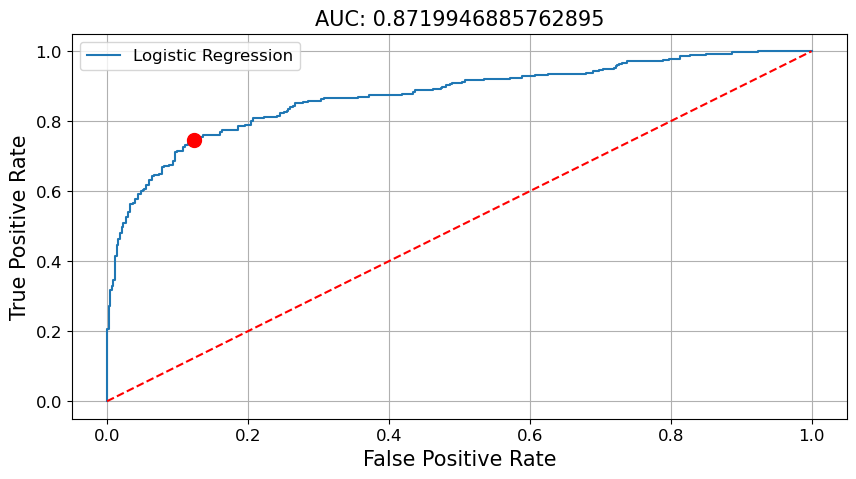

ROC Curve: Test


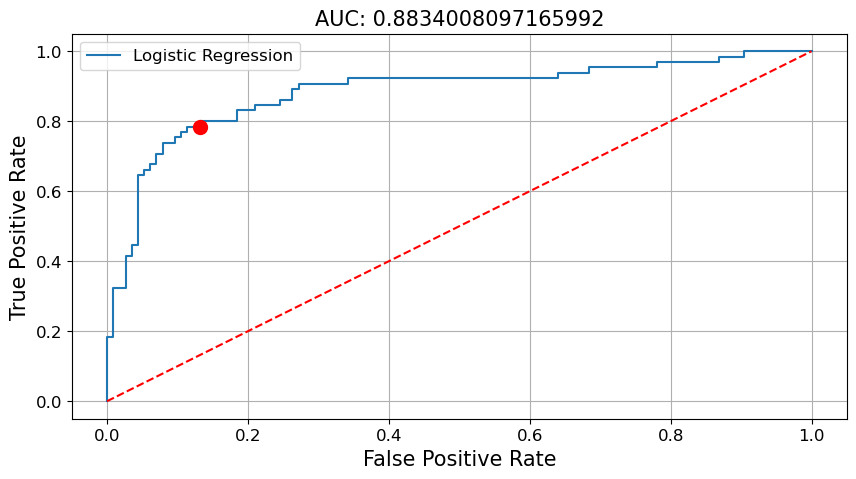

Precision-Recall Curve: Train


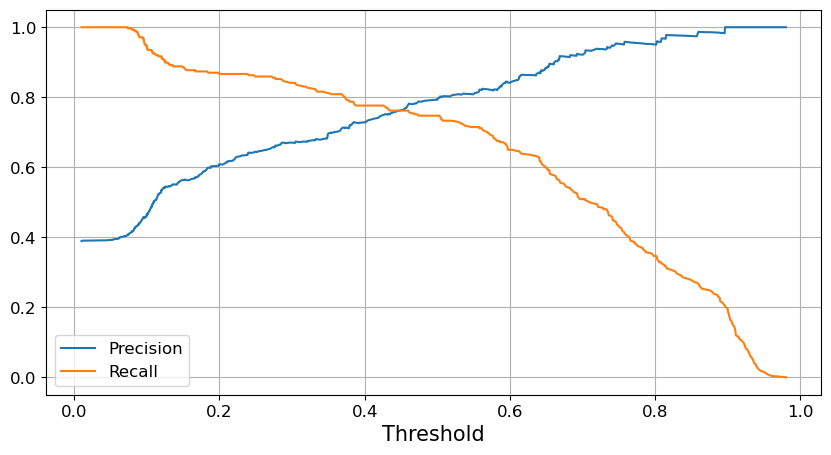

Precision-Recall Curve: Test


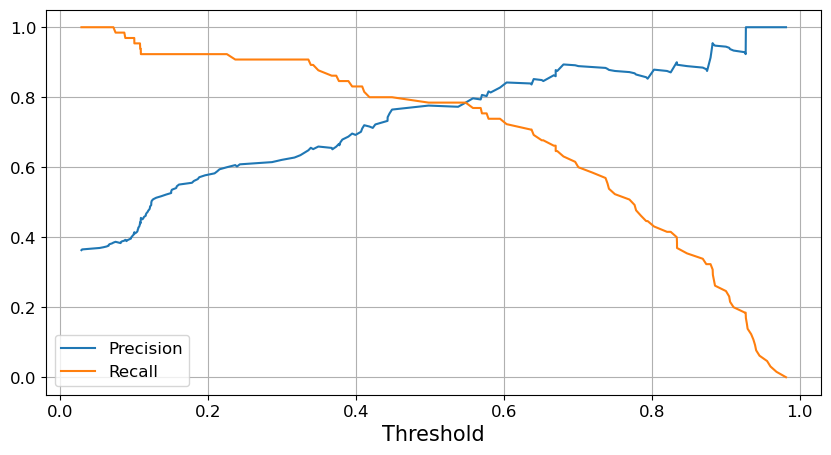

,Accuracy,AUC
Train,0.83,0.87
Test,0.84,0.88


In [4]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Titanic', 'Titanic.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = fillnull(df)
df = prep(df)

Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

label_colname = ['Sex', 'Cabin', 'Ticket']
encoder = preprocessing.LabelEncoder()
X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

onehot_colname = ['Name', 'Embarked']
X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
X_test_fe = onehot_encoding(X_test_fe, onehot_colname)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)  

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Logistic Regression
X_train_fes = sm.add_constant(X_train_fes)
X_test_fes = sm.add_constant(X_test_fes)

model_logitreg = LogisticRegression(fit_intercept=False)
model_logitreg.fit(X_train_fes, Y_train)

## 계수 해석
print("Effect of X..")
display(pd.DataFrame({'features': X_train_fes.columns,
                      'coef': model_logitreg.coef_[0],
                      'odds': np.exp(model_logitreg.coef_[0])}))

# 예측
Y_trpred = model_logitreg.predict(X_train_fes)
Y_tepred = model_logitreg.predict(X_test_fes)
P_trpred = model_logitreg.predict_proba(X_train_fes)
P_tepred = model_logitreg.predict_proba(X_test_fes)

# 평가/검증
label = 'Logistic Regression'
## Confusion Matrix
print('Confusion Matrix: Train')
evaluation_class_ConfusionMatrix(Y_train, Y_trpred)
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Train')
evaluation_class_ClassificationReport(Y_train, Y_trpred)
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Train')
evaluation_class_ROCAUC(Y_train, P_trpred[:,1], label=label)
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred[:,1], label=label)

## Precision-Recall Curve
print('Precision-Recall Curve: Train')
evaluation_class_PrecisionRecall(Y_train, P_trpred[:,1])
print('Precision-Recall Curve: Test')
evaluation_class_PrecisionRecall(Y_test, P_tepred[:,1])

## 성능검증
Score_logitreg = evaluation_class_AccuracyAUC(Y_train, P_trpred[:,1], Y_test, P_tepred[:,1])
Score_logitreg

# **Advanced Algorithm:** Regularization

## Ridge

(712, 11) (712, 1)
(179, 11) (179, 1)
Effect of X..


,features,coef,odds
0,const,1.05,2.87
1,PassengerId,0.27,1.31
2,Pclass,-0.88,0.42
3,Sex,-0.90,0.41
4,Age,-0.13,0.88
5,SibSp,-0.35,0.71
6,Parch,-0.10,0.91
7,Ticket,0.34,1.41
8,Fare,0.31,1.37
9,Cabin,-0.17,0.84


Confusion Matrix: Train
Confusion Matrix: Test
Classification Metrics: Train
              precision    recall  f1-score   support

     class 0       0.82      0.86      0.84       435
     class 1       0.77      0.70      0.73       277

    accuracy                           0.80       712
   macro avg       0.79      0.78      0.79       712
weighted avg       0.80      0.80      0.80       712

Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.88      0.83      0.86       114
     class 1       0.73      0.80      0.76        65

    accuracy                           0.82       179
   macro avg       0.81      0.82      0.81       179
weighted avg       0.83      0.82      0.82       179

ROC Curve: Train


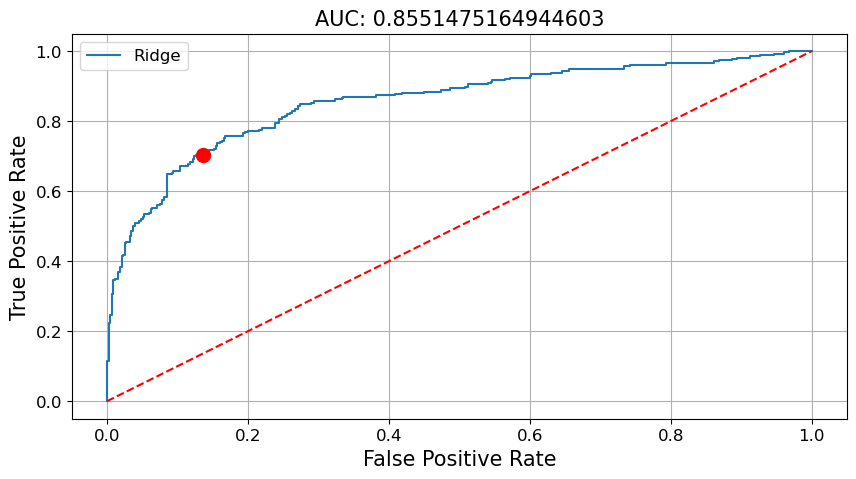

ROC Curve: Test


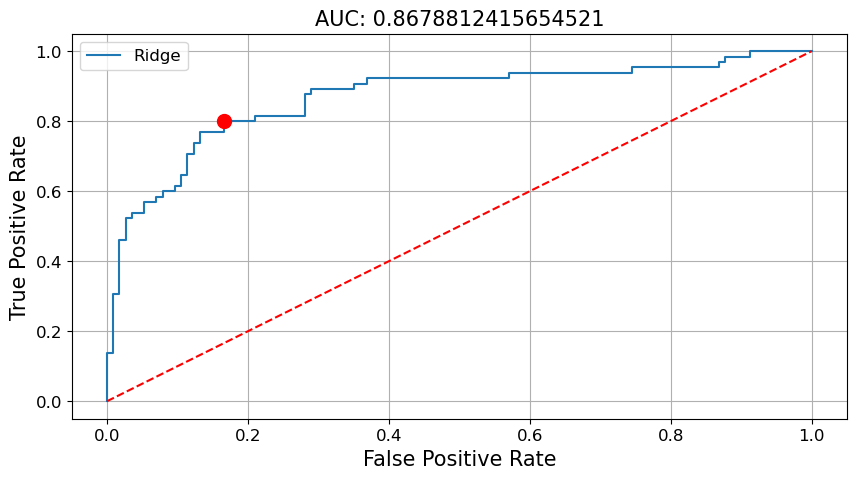

Precision-Recall Curve: Train


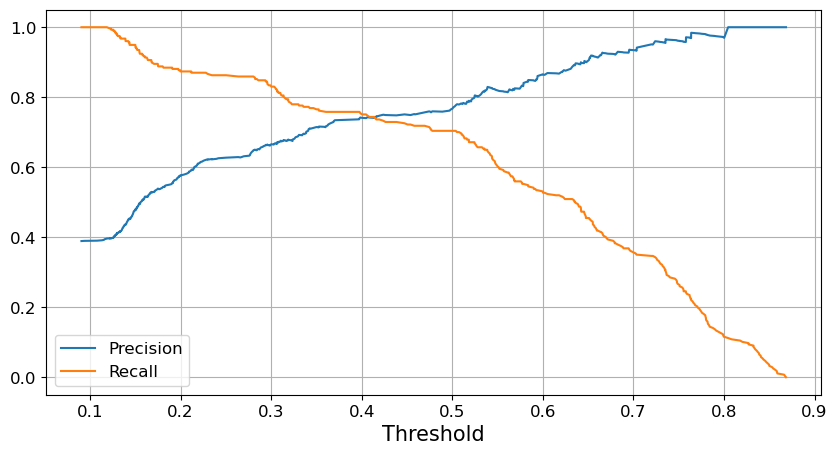

Precision-Recall Curve: Test


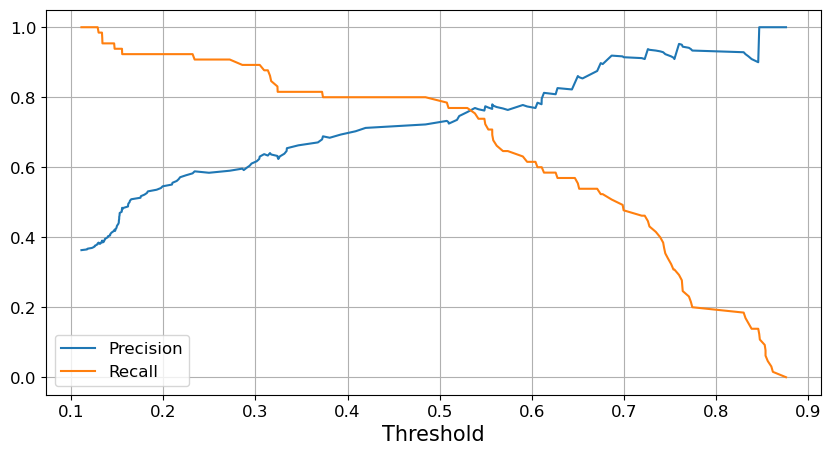

,Accuracy,AUC
Train,0.80,0.86
Test,0.82,0.87


In [5]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Titanic', 'Titanic.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = fillnull(df)
df = prep(df)

Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

label_colname = ['Sex', 'Cabin', 'Ticket']
encoder = preprocessing.LabelEncoder()
X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

onehot_colname = ['Name', 'Embarked']
X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
X_test_fe = onehot_encoding(X_test_fe, onehot_colname)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)  

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Logistic Regression
X_train_fes = sm.add_constant(X_train_fes)
X_test_fes = sm.add_constant(X_test_fes)

model_ridge = LogisticRegression(fit_intercept=False, 
                                 penalty='l2', C=0.1)
model_ridge.fit(X_train_fes, Y_train)

## 계수 해석
print("Effect of X..")
display(pd.DataFrame({'features': X_train_fes.columns,
                      'coef': model_ridge.coef_[0],
                      'odds': np.exp(model_ridge.coef_[0])}))

# 예측
Y_trpred = model_ridge.predict(X_train_fes)
Y_tepred = model_ridge.predict(X_test_fes)
P_trpred = model_ridge.predict_proba(X_train_fes)
P_tepred = model_ridge.predict_proba(X_test_fes)

# 평가/검증
label = 'Ridge'
## Confusion Matrix
print('Confusion Matrix: Train')
evaluation_class_ConfusionMatrix(Y_train, Y_trpred)
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Train')
evaluation_class_ClassificationReport(Y_train, Y_trpred)
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Train')
evaluation_class_ROCAUC(Y_train, P_trpred[:,1], label=label)
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred[:,1], label=label)

## Precision-Recall Curve
print('Precision-Recall Curve: Train')
evaluation_class_PrecisionRecall(Y_train, P_trpred[:,1])
print('Precision-Recall Curve: Test')
evaluation_class_PrecisionRecall(Y_test, P_tepred[:,1])

## 성능검증
Score_ridge = evaluation_class_AccuracyAUC(Y_train, P_trpred[:,1], Y_test, P_tepred[:,1])
Score_ridge

## Lasso

(712, 11) (712, 1)
(179, 11) (179, 1)
Effect of X..


,features,coef,odds
0,const,1.26,3.51
1,PassengerId,0.00,1.00
2,Pclass,-0.97,0.38
3,Sex,-0.62,0.54
4,Age,0.00,1.00
5,SibSp,0.00,1.00
6,Parch,0.00,1.00
7,Ticket,0.00,1.00
8,Fare,0.00,1.00
9,Cabin,0.00,1.00


Confusion Matrix: Train
Confusion Matrix: Test
Classification Metrics: Train
              precision    recall  f1-score   support

     class 0       0.82      0.83      0.83       435
     class 1       0.73      0.71      0.72       277

    accuracy                           0.79       712
   macro avg       0.78      0.77      0.77       712
weighted avg       0.79      0.79      0.79       712

Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.88      0.80      0.83       114
     class 1       0.69      0.80      0.74        65

    accuracy                           0.80       179
   macro avg       0.78      0.80      0.79       179
weighted avg       0.81      0.80      0.80       179

ROC Curve: Train


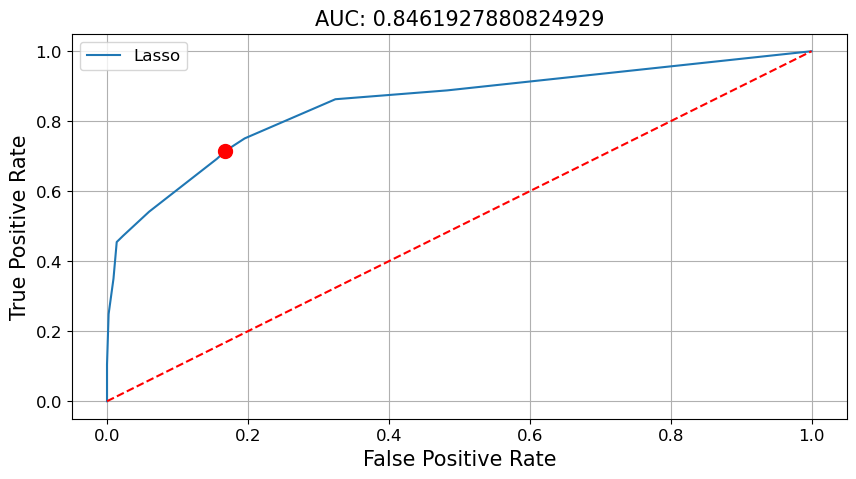

ROC Curve: Test


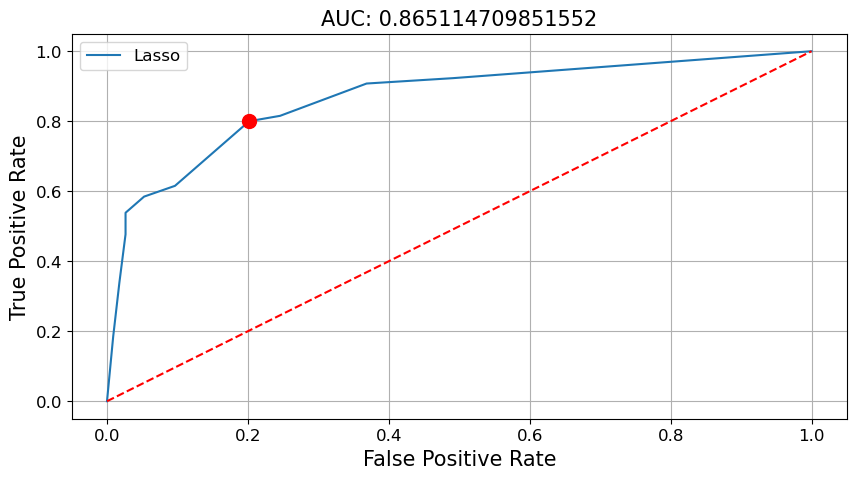

Precision-Recall Curve: Train


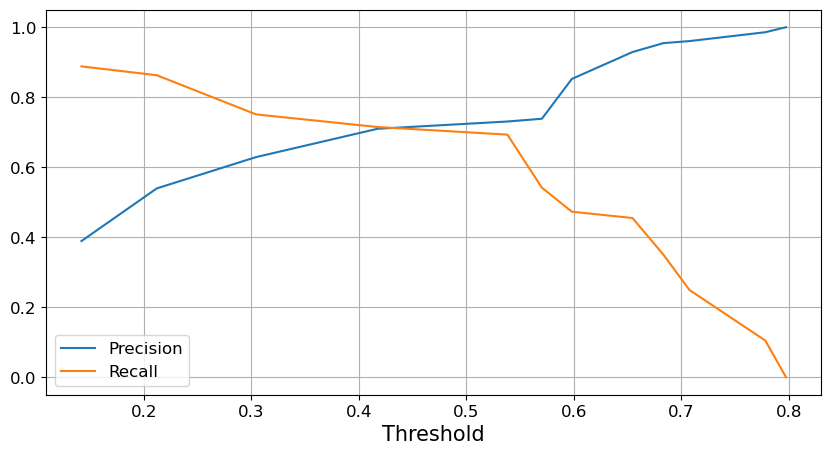

Precision-Recall Curve: Test


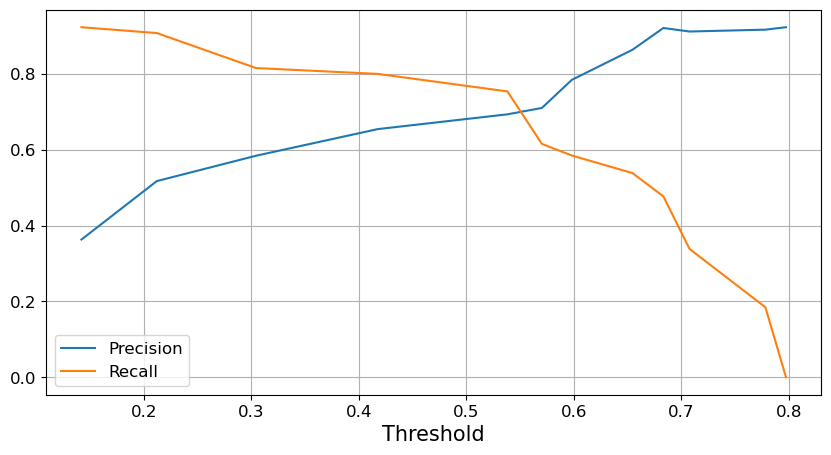

,Accuracy,AUC
Train,0.79,0.85
Test,0.80,0.87


In [6]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Titanic', 'Titanic.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = fillnull(df)
df = prep(df)

Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

label_colname = ['Sex', 'Cabin', 'Ticket']
encoder = preprocessing.LabelEncoder()
X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

onehot_colname = ['Name', 'Embarked']
X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
X_test_fe = onehot_encoding(X_test_fe, onehot_colname)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)  

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Logistic Regression
X_train_fes = sm.add_constant(X_train_fes)
X_test_fes = sm.add_constant(X_test_fes)

model_lasso = LogisticRegression(fit_intercept=False, 
                                 penalty='l1', C=0.1, solver='saga')
model_lasso.fit(X_train_fes, Y_train)

## 계수 해석
print("Effect of X..")
display(pd.DataFrame({'features': X_train_fes.columns,
                      'coef': model_lasso.coef_[0],
                      'odds': np.exp(model_lasso.coef_[0])}))

# 예측
Y_trpred = model_lasso.predict(X_train_fes)
Y_tepred = model_lasso.predict(X_test_fes)
P_trpred = model_lasso.predict_proba(X_train_fes)
P_tepred = model_lasso.predict_proba(X_test_fes)

# 평가/검증
label = 'Lasso'
## Confusion Matrix
print('Confusion Matrix: Train')
evaluation_class_ConfusionMatrix(Y_train, Y_trpred)
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Train')
evaluation_class_ClassificationReport(Y_train, Y_trpred)
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Train')
evaluation_class_ROCAUC(Y_train, P_trpred[:,1], label=label)
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred[:,1], label=label)

## Precision-Recall Curve
print('Precision-Recall Curve: Train')
evaluation_class_PrecisionRecall(Y_train, P_trpred[:,1])
print('Precision-Recall Curve: Test')
evaluation_class_PrecisionRecall(Y_test, P_tepred[:,1])

## 성능검증
Score_lasso = evaluation_class_AccuracyAUC(Y_train, P_trpred[:,1], Y_test, P_tepred[:,1])
Score_lasso

## Elastic Net

(712, 11) (712, 1)
(179, 11) (179, 1)
Effect of X..


,features,coef,odds
0,const,1.14,3.11
1,PassengerId,0.05,1.05
2,Pclass,-0.95,0.39
3,Sex,-0.81,0.44
4,Age,0.00,1.00
5,SibSp,0.00,1.00
6,Parch,0.00,1.00
7,Ticket,0.00,1.00
8,Fare,0.00,1.00
9,Cabin,0.00,1.00


Confusion Matrix: Train
Confusion Matrix: Test
Classification Metrics: Train
              precision    recall  f1-score   support

     class 0       0.82      0.84      0.83       435
     class 1       0.74      0.70      0.72       277

    accuracy                           0.79       712
   macro avg       0.78      0.77      0.78       712
weighted avg       0.79      0.79      0.79       712

Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.87      0.82      0.85       114
     class 1       0.72      0.78      0.75        65

    accuracy                           0.81       179
   macro avg       0.79      0.80      0.80       179
weighted avg       0.82      0.81      0.81       179

ROC Curve: Train


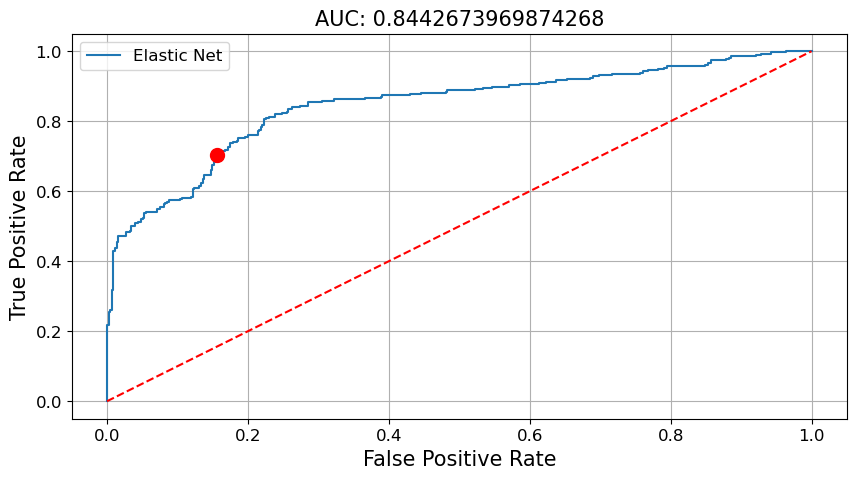

ROC Curve: Test


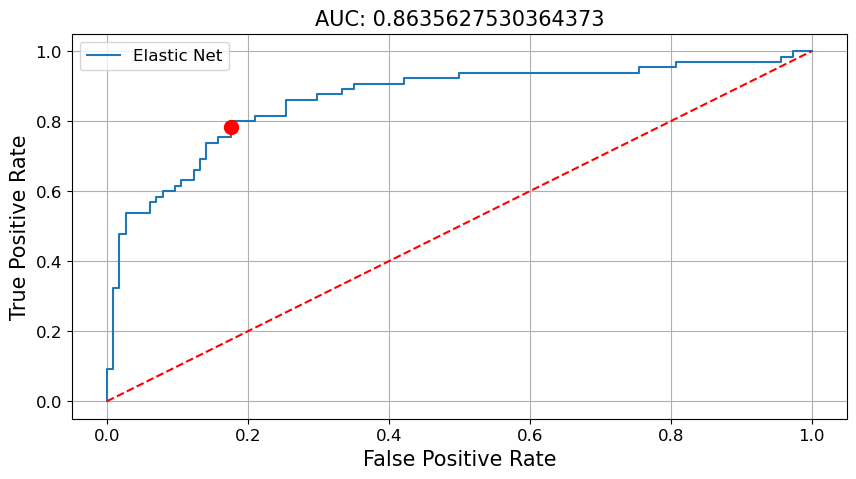

Precision-Recall Curve: Train


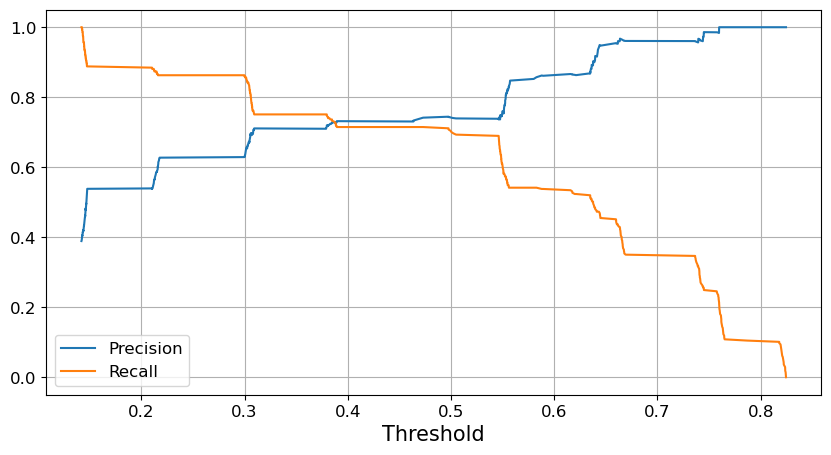

Precision-Recall Curve: Test


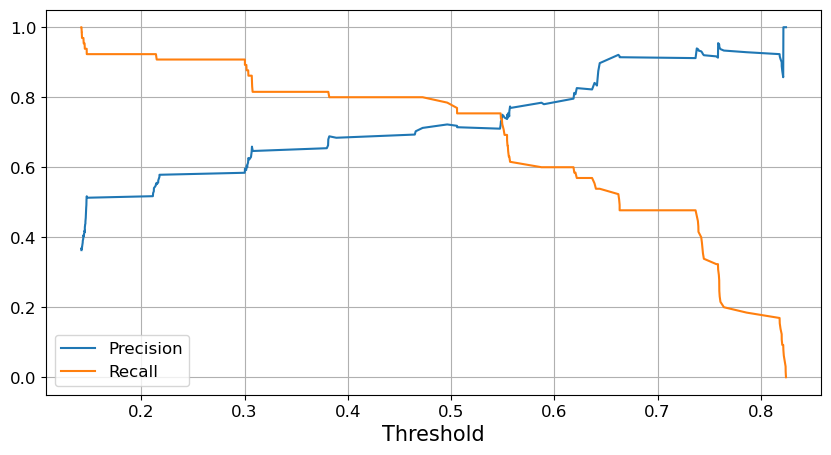

,Accuracy,AUC
Train,0.79,0.84
Test,0.81,0.86


In [7]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Titanic', 'Titanic.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = fillnull(df)
df = prep(df)

Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

label_colname = ['Sex', 'Cabin', 'Ticket']
encoder = preprocessing.LabelEncoder()
X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

onehot_colname = ['Name', 'Embarked']
X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
X_test_fe = onehot_encoding(X_test_fe, onehot_colname)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)  

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Logistic Regression
X_train_fes = sm.add_constant(X_train_fes)
X_test_fes = sm.add_constant(X_test_fes)

model_en = LogisticRegression(fit_intercept=False, 
                              penalty='elasticnet', C=0.1, l1_ratio=0.5, solver='saga')
model_en.fit(X_train_fes, Y_train)

## 계수 해석
print("Effect of X..")
display(pd.DataFrame({'features': X_train_fes.columns,
                      'coef': model_en.coef_[0],
                      'odds': np.exp(model_en.coef_[0])}))

# 예측
Y_trpred = model_en.predict(X_train_fes)
Y_tepred = model_en.predict(X_test_fes)
P_trpred = model_en.predict_proba(X_train_fes)
P_tepred = model_en.predict_proba(X_test_fes)

# 평가/검증
label = 'Elastic Net'
## Confusion Matrix
print('Confusion Matrix: Train')
evaluation_class_ConfusionMatrix(Y_train, Y_trpred)
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Train')
evaluation_class_ClassificationReport(Y_train, Y_trpred)
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Train')
evaluation_class_ROCAUC(Y_train, P_trpred[:,1], label=label)
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred[:,1], label=label)

## Precision-Recall Curve
print('Precision-Recall Curve: Train')
evaluation_class_PrecisionRecall(Y_train, P_trpred[:,1])
print('Precision-Recall Curve: Test')
evaluation_class_PrecisionRecall(Y_test, P_tepred[:,1])

## 성능검증
Score_en = evaluation_class_AccuracyAUC(Y_train, P_trpred[:,1], Y_test, P_tepred[:,1])
Score_en

# **Advanced Algorithm:** Voting

(712, 11) (712, 1)
(179, 11) (179, 1)
Confusion Matrix: Train
Confusion Matrix: Test
Classification Metrics: Train
              precision    recall  f1-score   support

     class 0       0.85      0.92      0.88       435
     class 1       0.85      0.74      0.79       277

    accuracy                           0.85       712
   macro avg       0.85      0.83      0.84       712
weighted avg       0.85      0.85      0.85       712

Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.88      0.86      0.87       114
     class 1       0.76      0.80      0.78        65

    accuracy                           0.84       179
   macro avg       0.82      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

ROC Curve: Train


  File "C:\Users\KK\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\KK\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\KK\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\KK\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


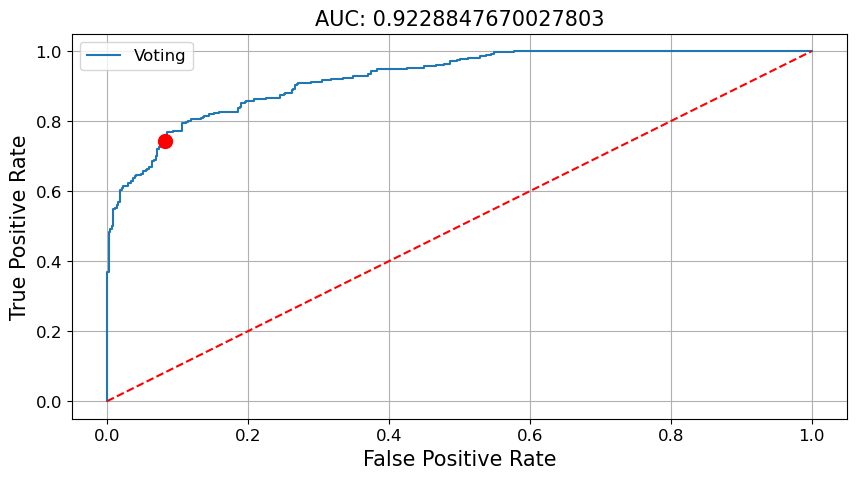

ROC Curve: Test


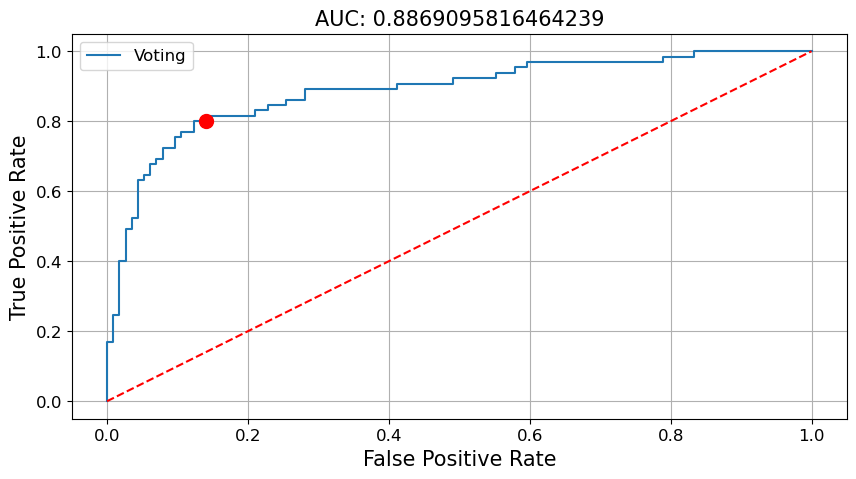

Precision-Recall Curve: Train


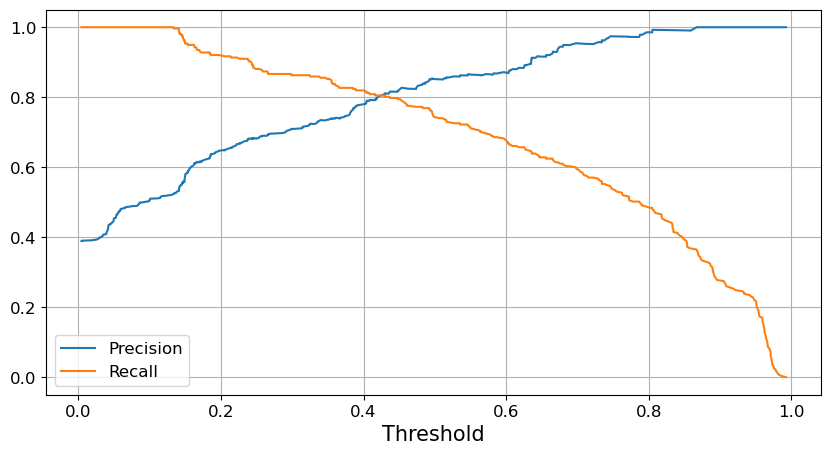

Precision-Recall Curve: Test


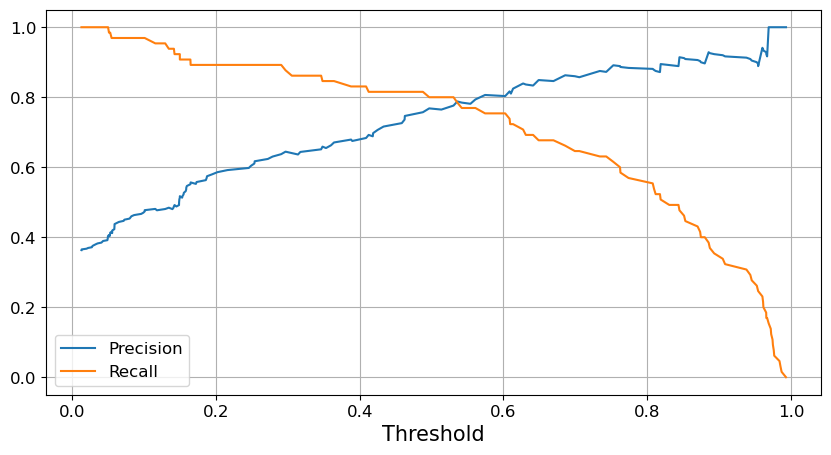

,Accuracy,AUC
Train,0.85,0.92
Test,0.84,0.89


In [8]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Titanic', 'Titanic.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = fillnull(df)
df = prep(df)

Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

label_colname = ['Sex', 'Cabin', 'Ticket']
encoder = preprocessing.LabelEncoder()
X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

onehot_colname = ['Name', 'Embarked']
X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
X_test_fe = onehot_encoding(X_test_fe, onehot_colname)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)  

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Voting
## Weak Learners
model_logitreg = LogisticRegression()
model_knn = KNeighborsClassifier()
clf = [('LR', model_logitreg), ('KNN', model_knn)]
voting_type = 'soft'
model_voting = VotingClassifier(estimators=clf, voting=voting_type)
model_voting.fit(X_train_fes, Y_train)

# 예측
Y_trpred = model_voting.predict(X_train_fes)
Y_tepred = model_voting.predict(X_test_fes)
P_trpred = model_voting.predict_proba(X_train_fes)
P_tepred = model_voting.predict_proba(X_test_fes)

# 평가/검증
label = 'Voting'
## Confusion Matrix
print('Confusion Matrix: Train')
evaluation_class_ConfusionMatrix(Y_train, Y_trpred)
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Train')
evaluation_class_ClassificationReport(Y_train, Y_trpred)
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Train')
evaluation_class_ROCAUC(Y_train, P_trpred[:,1], label=label)
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred[:,1], label=label)

## Precision-Recall Curve
print('Precision-Recall Curve: Train')
evaluation_class_PrecisionRecall(Y_train, P_trpred[:,1])
print('Precision-Recall Curve: Test')
evaluation_class_PrecisionRecall(Y_test, P_tepred[:,1])

## 성능검증
Score_voting = evaluation_class_AccuracyAUC(Y_train, P_trpred[:,1], Y_test, P_tepred[:,1])
Score_voting

# **Advanced Algorithm:** Bagging

##  Decision Tree

(712, 11) (712, 1)
(179, 11) (179, 1)
변수 중요도: 


,Importance
PassengerId,0.29
Pclass,0.08
Sex,0.00
Age,0.07
SibSp,0.01
Parch,0.01
Ticket,0.05
Fare,0.17
Cabin,0.03
Name_Mr,0.24


Confusion Matrix: Train
Confusion Matrix: Test
Classification Metrics: Train
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00       435
     class 1       1.00      1.00      1.00       277

    accuracy                           1.00       712
   macro avg       1.00      1.00      1.00       712
weighted avg       1.00      1.00      1.00       712

Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.82      0.72      0.77       114
     class 1       0.59      0.72      0.65        65

    accuracy                           0.72       179
   macro avg       0.71      0.72      0.71       179
weighted avg       0.74      0.72      0.73       179

ROC Curve: Train


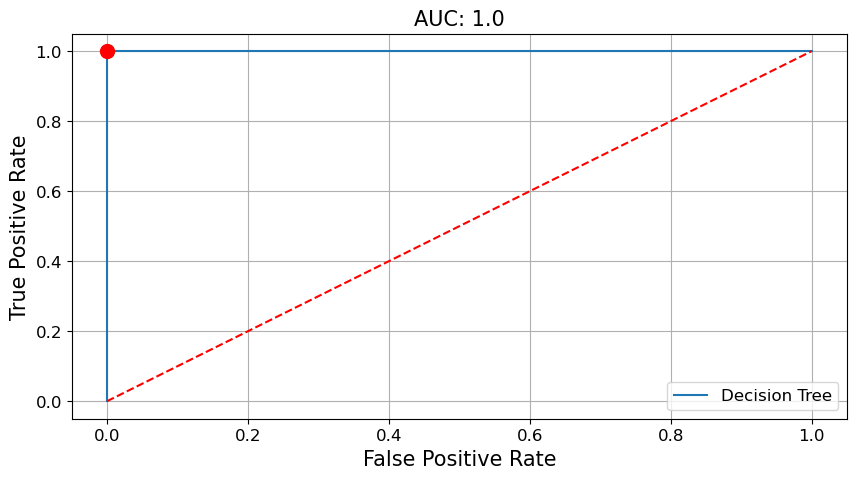

ROC Curve: Test


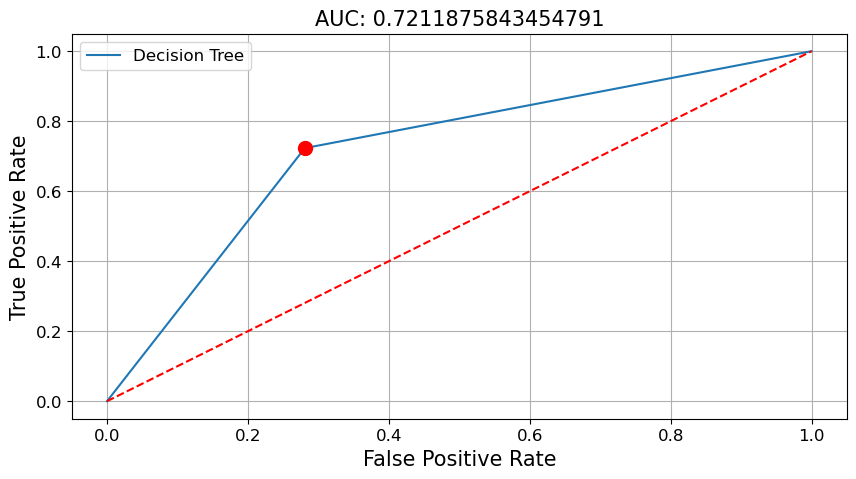

Precision-Recall Curve: Train


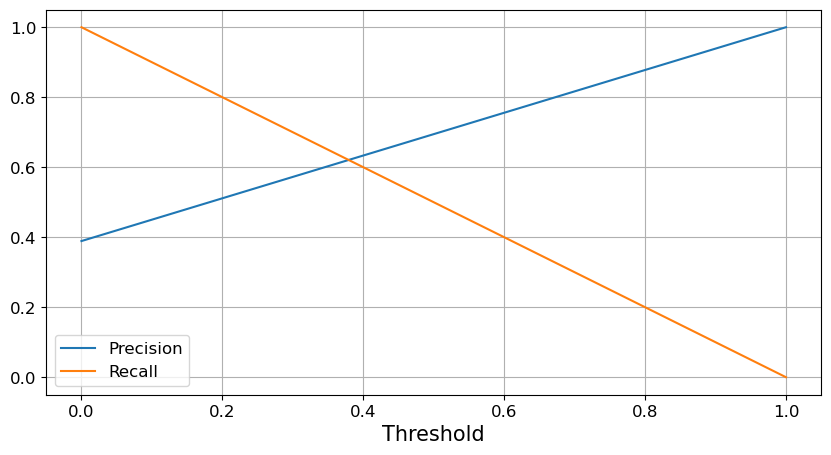

Precision-Recall Curve: Test


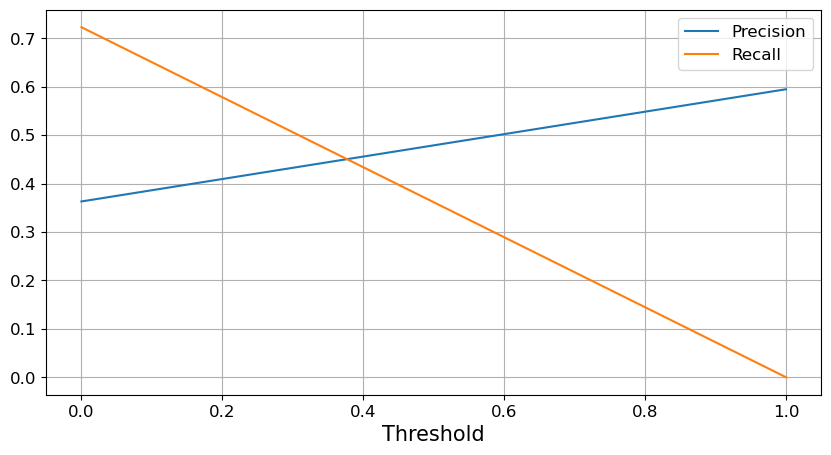

,Accuracy,AUC
Train,1.00,1.00
Test,0.72,0.72


In [9]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Titanic', 'Titanic.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = fillnull(df)
df = prep(df)

Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

label_colname = ['Sex', 'Cabin', 'Ticket']
encoder = preprocessing.LabelEncoder()
X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

onehot_colname = ['Name', 'Embarked']
X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
X_test_fe = onehot_encoding(X_test_fe, onehot_colname)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)  

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Decision Tree
model_dt = DecisionTreeClassifier(criterion='entropy', random_state=123)
model_dt.fit(X_train_fes, Y_train)
print("변수 중요도: ")
display(pd.DataFrame(model_dt.feature_importances_, 
                     index=model_dt.feature_names_in_, columns=['Importance']))

# 예측
Y_trpred = model_dt.predict(X_train_fes)
Y_tepred = model_dt.predict(X_test_fes)
P_trpred = model_dt.predict_proba(X_train_fes)
P_tepred = model_dt.predict_proba(X_test_fes)

# 평가/검증
label = 'Decision Tree'
## Confusion Matrix
print('Confusion Matrix: Train')
evaluation_class_ConfusionMatrix(Y_train, Y_trpred)
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Train')
evaluation_class_ClassificationReport(Y_train, Y_trpred)
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Train')
evaluation_class_ROCAUC(Y_train, P_trpred[:,1], label=label)
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred[:,1], label=label)

## Precision-Recall Curve
print('Precision-Recall Curve: Train')
evaluation_class_PrecisionRecall(Y_train, P_trpred[:,1])
print('Precision-Recall Curve: Test')
evaluation_class_PrecisionRecall(Y_test, P_tepred[:,1])

## 성능검증
Score_dt = evaluation_class_AccuracyAUC(Y_train, P_trpred[:,1], Y_test, P_tepred[:,1])
Score_dt

## Random Forest

(712, 11) (712, 1)
(179, 11) (179, 1)
변수 중요도: 


,Importance
PassengerId,0.18
Pclass,0.06
Sex,0.11
Age,0.08
SibSp,0.05
Parch,0.03
Ticket,0.05
Fare,0.16
Cabin,0.06
Name_Mr,0.15


Confusion Matrix: Train
Confusion Matrix: Test
Classification Metrics: Train
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00       435
     class 1       1.00      1.00      1.00       277

    accuracy                           1.00       712
   macro avg       1.00      1.00      1.00       712
weighted avg       1.00      1.00      1.00       712

Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.87      0.86      0.86       114
     class 1       0.76      0.77      0.76        65

    accuracy                           0.83       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179

ROC Curve: Train


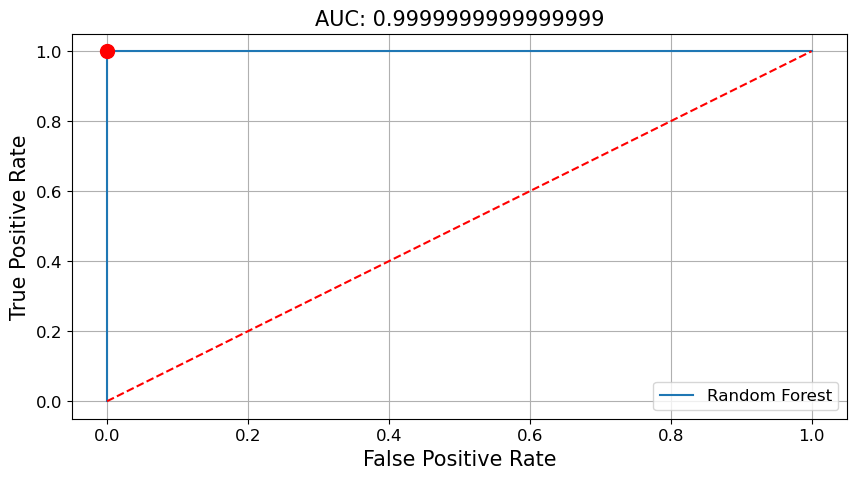

ROC Curve: Test


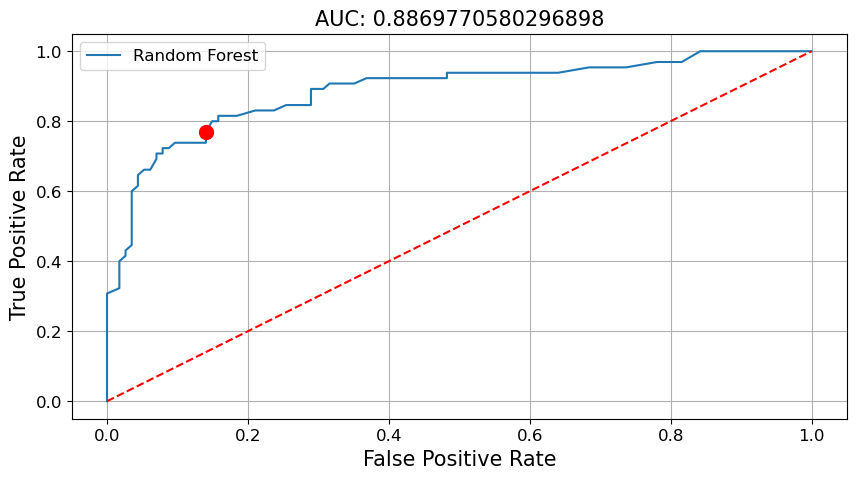

Precision-Recall Curve: Train


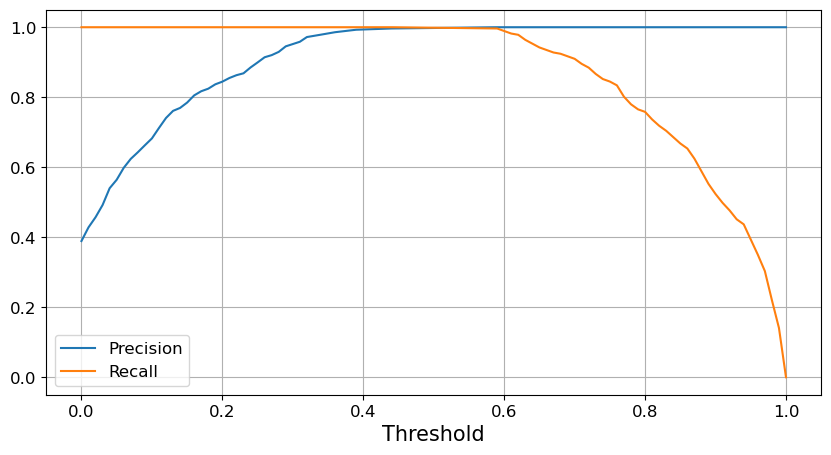

Precision-Recall Curve: Test


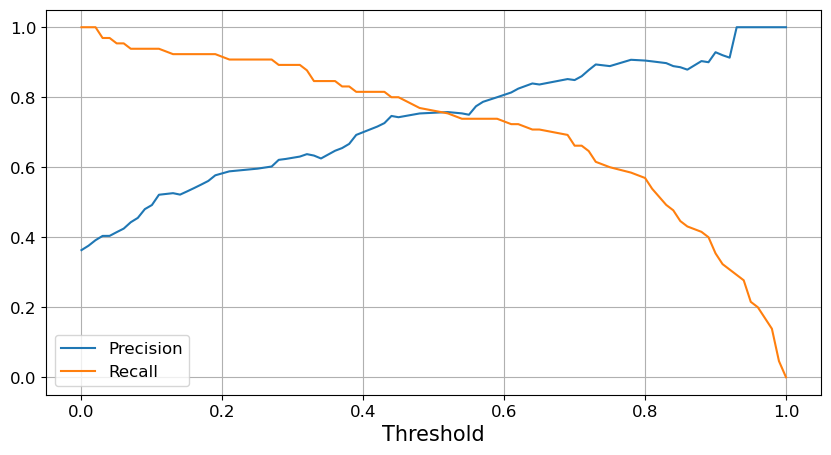

,Accuracy,AUC
Train,1.00,1.00
Test,0.83,0.89


In [10]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Titanic', 'Titanic.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = fillnull(df)
df = prep(df)

Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

label_colname = ['Sex', 'Cabin', 'Ticket']
encoder = preprocessing.LabelEncoder()
X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

onehot_colname = ['Name', 'Embarked']
X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
X_test_fe = onehot_encoding(X_test_fe, onehot_colname)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)  

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=123)
model_rf.fit(X_train_fes, Y_train)
print("변수 중요도: ")
display(pd.DataFrame(model_rf.feature_importances_, 
                     index=model_rf.feature_names_in_, columns=['Importance']))

# 예측
Y_trpred = model_rf.predict(X_train_fes)
Y_tepred = model_rf.predict(X_test_fes)
P_trpred = model_rf.predict_proba(X_train_fes)
P_tepred = model_rf.predict_proba(X_test_fes)

# 평가/검증
label = 'Random Forest'
## Confusion Matrix
print('Confusion Matrix: Train')
evaluation_class_ConfusionMatrix(Y_train, Y_trpred)
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Train')
evaluation_class_ClassificationReport(Y_train, Y_trpred)
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Train')
evaluation_class_ROCAUC(Y_train, P_trpred[:,1], label=label)
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred[:,1], label=label)

## Precision-Recall Curve
print('Precision-Recall Curve: Train')
evaluation_class_PrecisionRecall(Y_train, P_trpred[:,1])
print('Precision-Recall Curve: Test')
evaluation_class_PrecisionRecall(Y_test, P_tepred[:,1])

## 성능검증
Score_rf = evaluation_class_AccuracyAUC(Y_train, P_trpred[:,1], Y_test, P_tepred[:,1])
Score_rf

## Random Forest with Hyperparameter Tuning

(712, 11) (712, 1)
(179, 11) (179, 1)
최적 하이퍼 파라미터:  {'max_depth': 11, 'min_samples_leaf': 7, 'min_samples_split': 5, 'n_estimators': 100}
변수 중요도: 


,Importance
PassengerId,0.06
Pclass,0.09
Sex,0.22
Age,0.04
SibSp,0.04
Parch,0.01
Ticket,0.02
Fare,0.12
Cabin,0.05
Name_Mr,0.27


Confusion Matrix: Train
Confusion Matrix: Test
Classification Metrics: Train
              precision    recall  f1-score   support

     class 0       0.86      0.92      0.89       435
     class 1       0.86      0.76      0.80       277

    accuracy                           0.86       712
   macro avg       0.86      0.84      0.85       712
weighted avg       0.86      0.86      0.85       712

Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.87      0.88      0.87       114
     class 1       0.78      0.77      0.78        65

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179

ROC Curve: Train


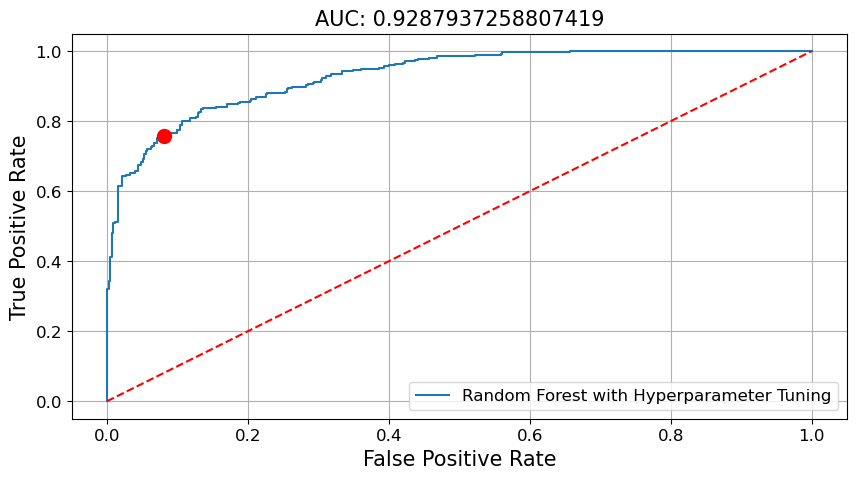

ROC Curve: Test


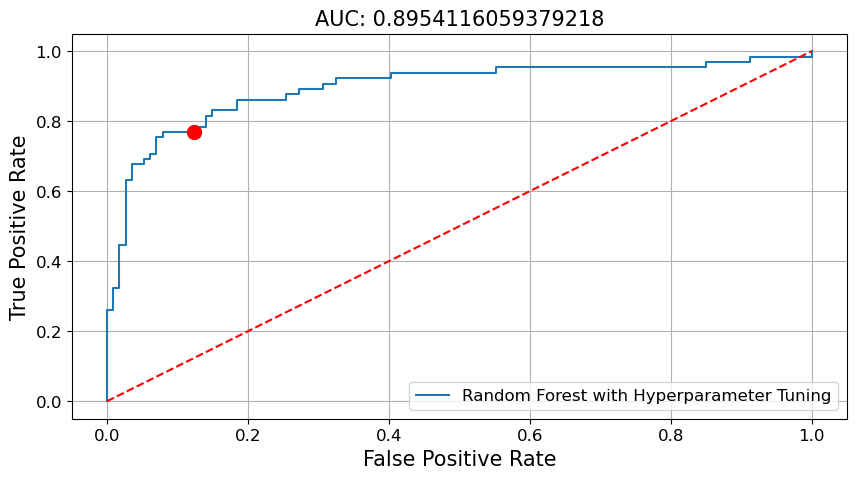

Precision-Recall Curve: Train


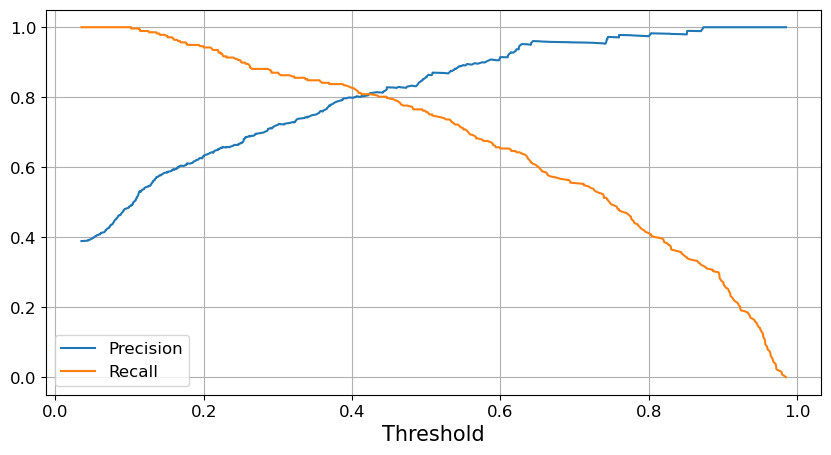

Precision-Recall Curve: Test


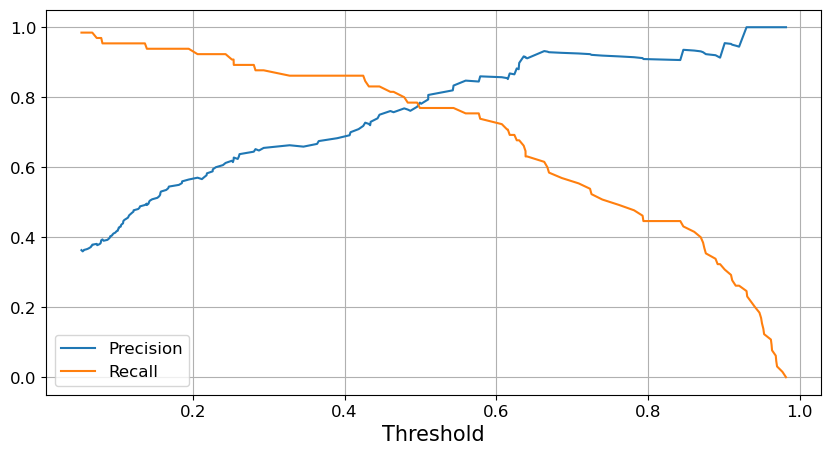

,Accuracy,AUC
Train,0.86,0.93
Test,0.84,0.90


In [11]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Titanic', 'Titanic.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = fillnull(df)
df = prep(df)

Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

label_colname = ['Sex', 'Cabin', 'Ticket']
encoder = preprocessing.LabelEncoder()
X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

onehot_colname = ['Name', 'Embarked']
X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
X_test_fe = onehot_encoding(X_test_fe, onehot_colname)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)  

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Random Forest
model_rf = RandomForestClassifier(random_state=123)
params = {'n_estimators': [100],  
          'max_depth': [5, 7, 9, 11],   
          'min_samples_leaf': [5, 7, 9, 11],   
          'min_samples_split': [5, 7, 9, 11]} 
model_rf_cv = GridSearchCV(estimator=model_rf, param_grid=params, 
                           cv=5,   
                           n_jobs=-1)   
model_rf_cv.fit(X_train_fes, Y_train)
print("최적 하이퍼 파라미터: ", model_rf_cv.best_params_)

model_rf_cv_final = RandomForestClassifier(**model_rf_cv.best_params_)
model_rf_cv_final.fit(X_train_fes, Y_train)
print("변수 중요도: ")
display(pd.DataFrame(model_rf_cv_final.feature_importances_, 
                     index=model_rf_cv_final.feature_names_in_, columns=['Importance']))

# 예측
Y_trpred = model_rf_cv_final.predict(X_train_fes)
Y_tepred = model_rf_cv_final.predict(X_test_fes)
P_trpred = model_rf_cv_final.predict_proba(X_train_fes)
P_tepred = model_rf_cv_final.predict_proba(X_test_fes)

# 평가/검증
label = 'Random Forest with Hyperparameter Tuning'
## Confusion Matrix
print('Confusion Matrix: Train')
evaluation_class_ConfusionMatrix(Y_train, Y_trpred)
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Train')
evaluation_class_ClassificationReport(Y_train, Y_trpred)
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Train')
evaluation_class_ROCAUC(Y_train, P_trpred[:,1], label=label)
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred[:,1], label=label)

## Precision-Recall Curve
print('Precision-Recall Curve: Train')
evaluation_class_PrecisionRecall(Y_train, P_trpred[:,1])
print('Precision-Recall Curve: Test')
evaluation_class_PrecisionRecall(Y_test, P_tepred[:,1])

## 성능검증
Score_rf_cv_final = evaluation_class_AccuracyAUC(Y_train, P_trpred[:,1], Y_test, P_tepred[:,1])
Score_rf_cv_final

# **Advanced Algorithm:** Boosting

## Gradient Boosting

(712, 11) (712, 1)
(179, 11) (179, 1)
변수 중요도: 


,Importance
PassengerId,0.07
Pclass,0.10
Sex,0.01
Age,0.04
SibSp,0.02
Parch,0.00
Ticket,0.04
Fare,0.15
Cabin,0.04
Name_Mr,0.46


Confusion Matrix: Train
Confusion Matrix: Test
Classification Metrics: Train
              precision    recall  f1-score   support

     class 0       0.90      0.94      0.92       435
     class 1       0.90      0.83      0.86       277

    accuracy                           0.90       712
   macro avg       0.90      0.89      0.89       712
weighted avg       0.90      0.90      0.90       712

Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.87      0.88      0.87       114
     class 1       0.78      0.77      0.78        65

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179

ROC Curve: Train


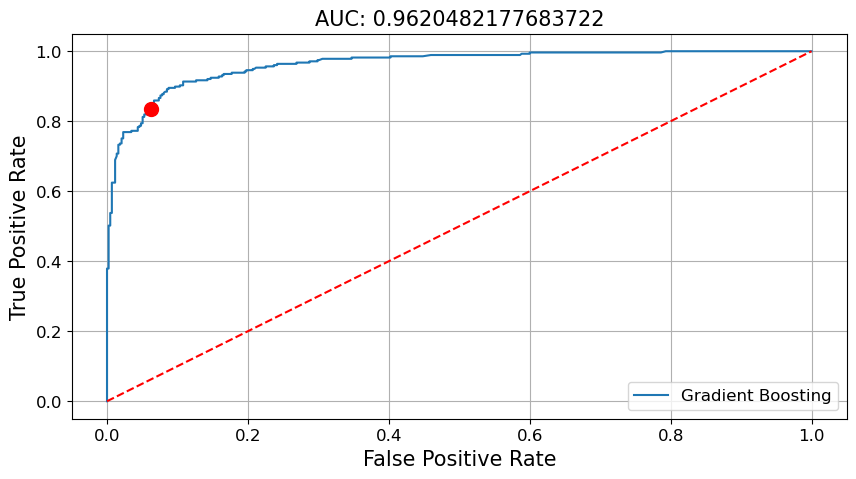

ROC Curve: Test


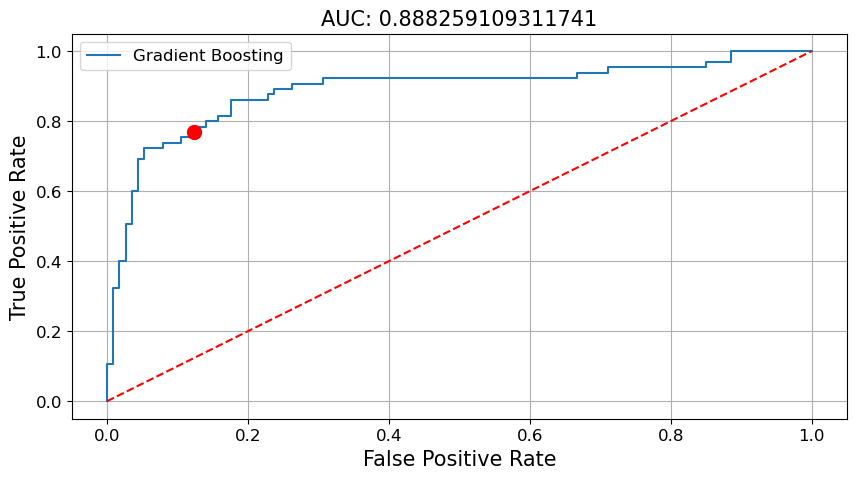

Precision-Recall Curve: Train


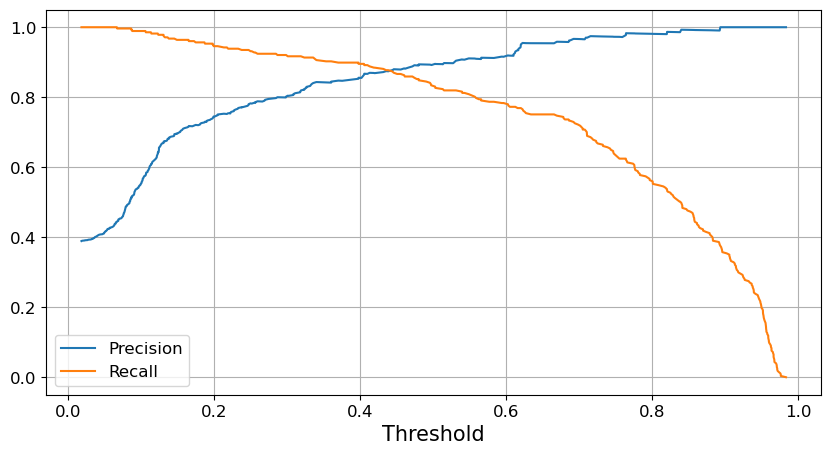

Precision-Recall Curve: Test


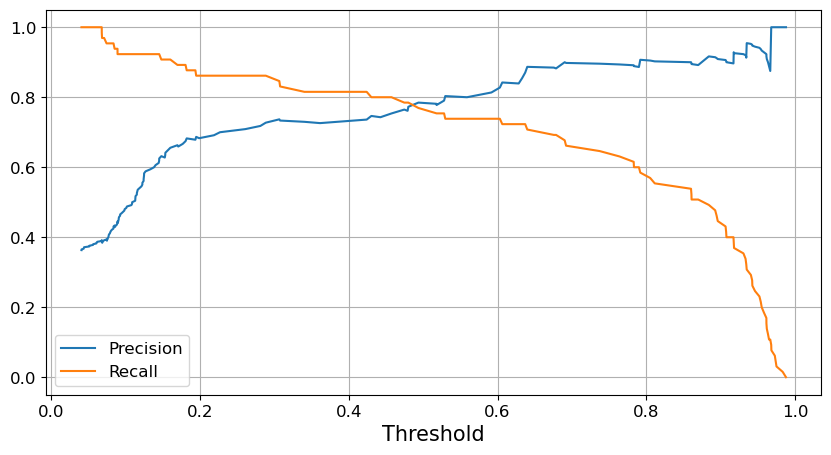

,Accuracy,AUC
Train,0.90,0.96
Test,0.84,0.89


In [12]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Titanic', 'Titanic.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = fillnull(df)
df = prep(df)

Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

label_colname = ['Sex', 'Cabin', 'Ticket']
encoder = preprocessing.LabelEncoder()
X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

onehot_colname = ['Name', 'Embarked']
X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
X_test_fe = onehot_encoding(X_test_fe, onehot_colname)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)  

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Gradient Boosting
model_gb = GradientBoostingClassifier(n_estimators=100,
                                      learning_rate=0.1,
                                      max_depth=3, random_state=123)
model_gb.fit(X_train_fes, Y_train)
print("변수 중요도: ")
display(pd.DataFrame(model_gb.feature_importances_, 
                     index=model_gb.feature_names_in_, columns=['Importance']))

# 예측
Y_trpred = model_gb.predict(X_train_fes)
Y_tepred = model_gb.predict(X_test_fes)
P_trpred = model_gb.predict_proba(X_train_fes)
P_tepred = model_gb.predict_proba(X_test_fes)

# 평가/검증
label = 'Gradient Boosting'
## Confusion Matrix
print('Confusion Matrix: Train')
evaluation_class_ConfusionMatrix(Y_train, Y_trpred)
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Train')
evaluation_class_ClassificationReport(Y_train, Y_trpred)
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Train')
evaluation_class_ROCAUC(Y_train, P_trpred[:,1], label=label)
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred[:,1], label=label)

## Precision-Recall Curve
print('Precision-Recall Curve: Train')
evaluation_class_PrecisionRecall(Y_train, P_trpred[:,1])
print('Precision-Recall Curve: Test')
evaluation_class_PrecisionRecall(Y_test, P_tepred[:,1])

## 성능검증
Score_gb = evaluation_class_AccuracyAUC(Y_train, P_trpred[:,1], Y_test, P_tepred[:,1])
Score_gb

## GBM with Hyperparameter Tuning

(712, 11) (712, 1)
(179, 11) (179, 1)
최적 하이퍼 파라미터:  {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 100}
변수 중요도: 


,Importance
PassengerId,0.17
Pclass,0.09
Sex,0.01
Age,0.05
SibSp,0.02
Parch,0.00
Ticket,0.04
Fare,0.16
Cabin,0.03
Name_Mr,0.36


Confusion Matrix: Train
Confusion Matrix: Test
Classification Metrics: Train
              precision    recall  f1-score   support

     class 0       0.96      0.99      0.98       435
     class 1       0.98      0.94      0.96       277

    accuracy                           0.97       712
   macro avg       0.97      0.96      0.97       712
weighted avg       0.97      0.97      0.97       712

Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.88      0.87      0.87       114
     class 1       0.77      0.78      0.78        65

    accuracy                           0.84       179
   macro avg       0.82      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

ROC Curve: Train


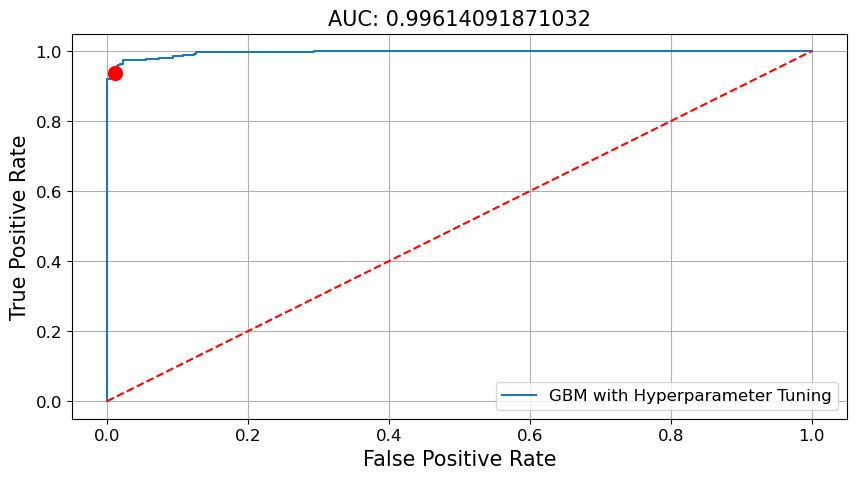

ROC Curve: Test


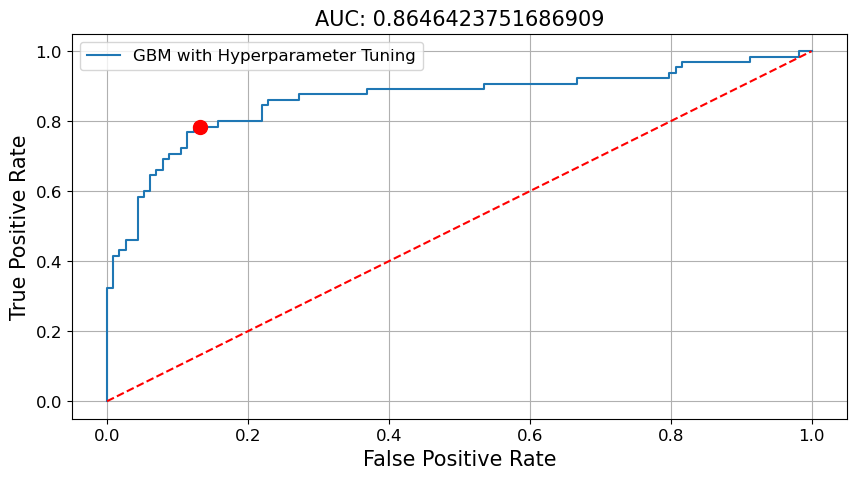

Precision-Recall Curve: Train


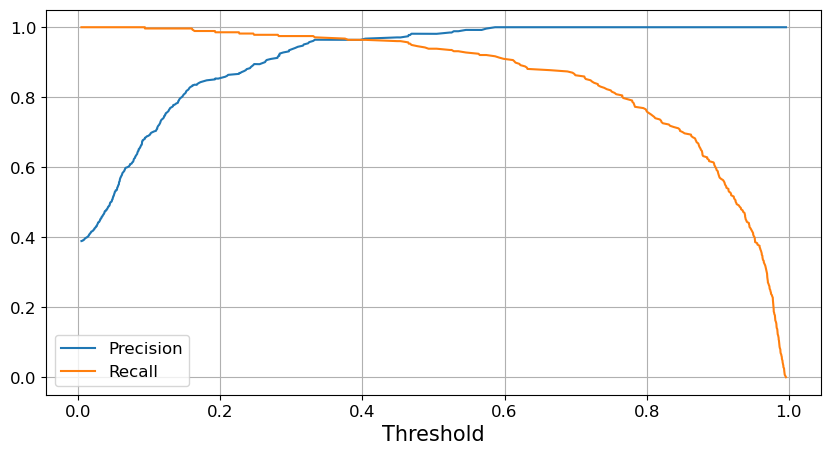

Precision-Recall Curve: Test


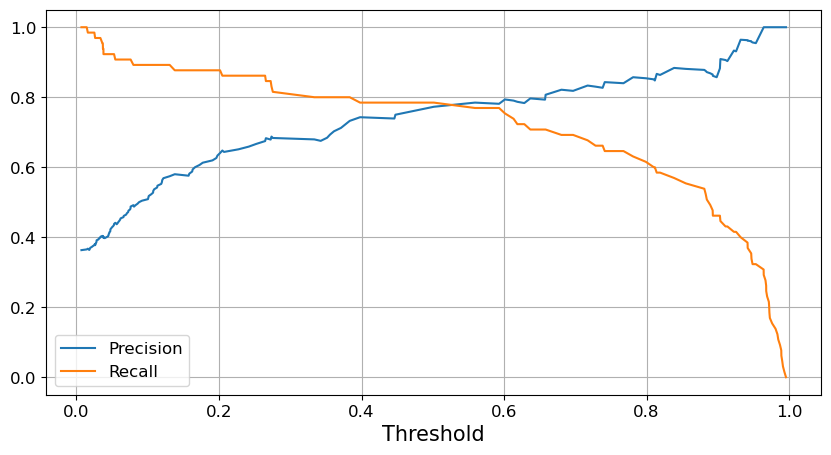

,Accuracy,AUC
Train,0.97,1.00
Test,0.84,0.86


In [13]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Titanic', 'Titanic.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = fillnull(df)
df = prep(df)

Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

label_colname = ['Sex', 'Cabin', 'Ticket']
encoder = preprocessing.LabelEncoder()
X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

onehot_colname = ['Name', 'Embarked']
X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
X_test_fe = onehot_encoding(X_test_fe, onehot_colname)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)  

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Gradient Boosting
model_gb = GradientBoostingClassifier()
params = {'n_estimators': [100],   
          'max_depth': [5, 7, 9, 11],    
          'min_samples_leaf': [5, 7, 9, 11],   
          'min_samples_split': [5, 7, 9, 11],  
          'learning_rate': [0.05, 0.1, 0.2]}   
model_gb_cv = GridSearchCV(estimator=model_gb, param_grid=params, 
                           cv=5,   
                           n_jobs=-1)   
model_gb_cv.fit(X_train_fes, Y_train)
print("최적 하이퍼 파라미터: ", model_gb_cv.best_params_)

model_gb_cv_final = GradientBoostingClassifier(**model_gb_cv.best_params_)
model_gb_cv_final.fit(X_train_fes, Y_train)
print("변수 중요도: ")
display(pd.DataFrame(model_gb_cv_final.feature_importances_, 
                     index=model_gb_cv_final.feature_names_in_, columns=['Importance']))

# 예측
Y_trpred = model_gb_cv_final.predict(X_train_fes)
Y_tepred = model_gb_cv_final.predict(X_test_fes)
P_trpred = model_gb_cv_final.predict_proba(X_train_fes)
P_tepred = model_gb_cv_final.predict_proba(X_test_fes)

# 평가/검증
label = 'GBM with Hyperparameter Tuning'
## Confusion Matrix
print('Confusion Matrix: Train')
evaluation_class_ConfusionMatrix(Y_train, Y_trpred)
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Train')
evaluation_class_ClassificationReport(Y_train, Y_trpred)
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Train')
evaluation_class_ROCAUC(Y_train, P_trpred[:,1], label=label)
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred[:,1], label=label)

## Precision-Recall Curve
print('Precision-Recall Curve: Train')
evaluation_class_PrecisionRecall(Y_train, P_trpred[:,1])
print('Precision-Recall Curve: Test')
evaluation_class_PrecisionRecall(Y_test, P_tepred[:,1])

## 성능검증
Score_gb_cv_final = evaluation_class_AccuracyAUC(Y_train, P_trpred[:,1], Y_test, P_tepred[:,1])
Score_gb_cv_final

## XGBoost

(712, 11) (712, 1)
(179, 11) (179, 1)
변수 중요도(분류기준): 


,Importance
PassengerId,0.02
Pclass,0.10
Sex,0.02
Age,0.02
SibSp,0.02
Parch,0.01
Ticket,0.02
Fare,0.03
Cabin,0.05
Name_Mr,0.54


변수 중요도(성능기준): 
Confusion Matrix: Train
Confusion Matrix: Test
Classification Metrics: Train
              precision    recall  f1-score   support

     class 0       0.89      0.92      0.91       435
     class 1       0.87      0.82      0.84       277

    accuracy                           0.88       712
   macro avg       0.88      0.87      0.87       712
weighted avg       0.88      0.88      0.88       712

Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.88      0.86      0.87       114
     class 1       0.76      0.78      0.77        65

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

ROC Curve: Train


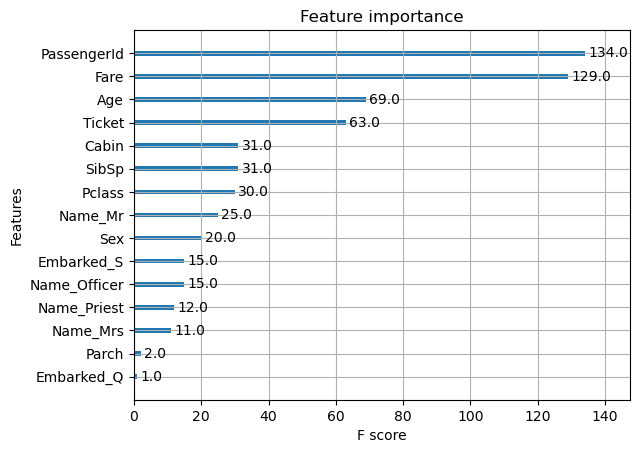

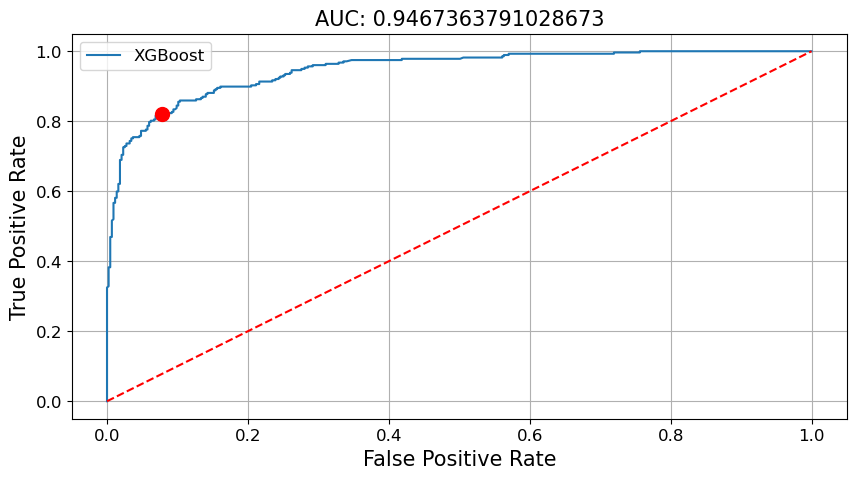

ROC Curve: Test


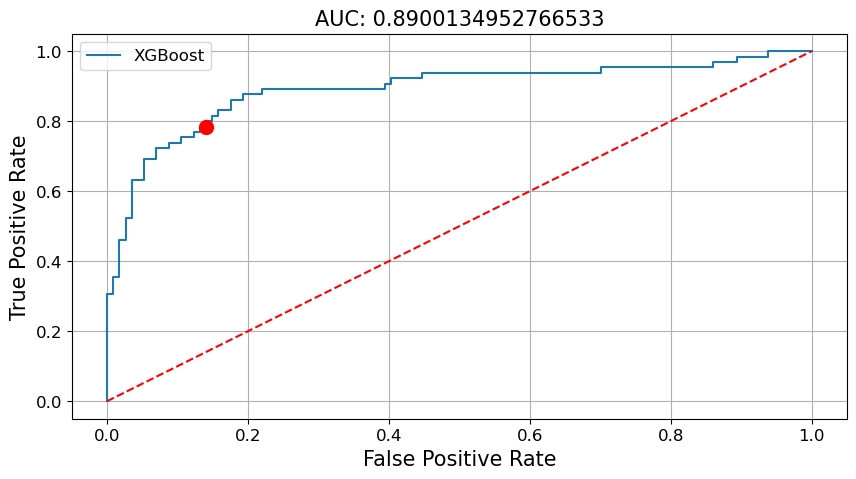

Precision-Recall Curve: Train


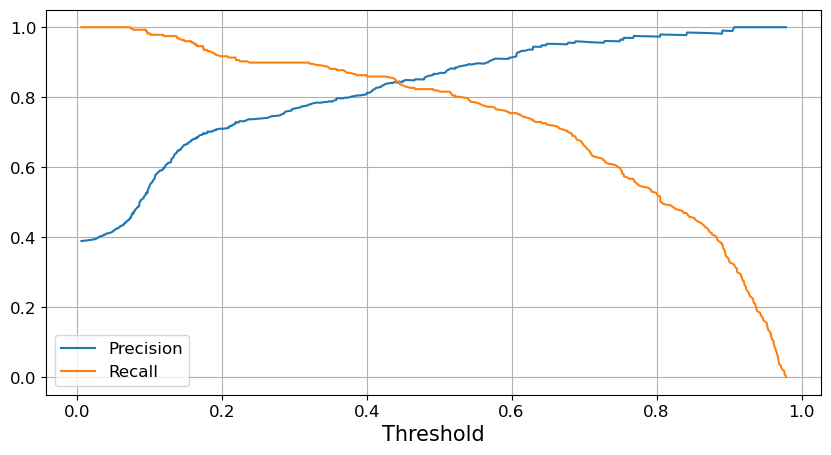

Precision-Recall Curve: Test


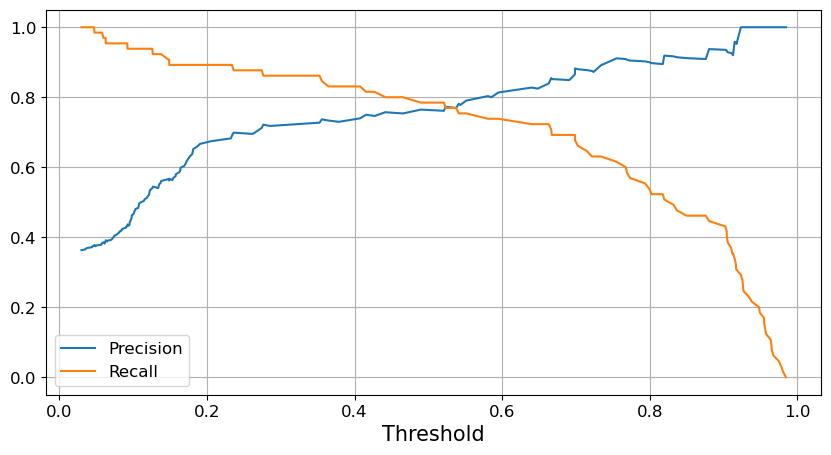

,Accuracy,AUC
Train,0.88,0.95
Test,0.83,0.89


In [14]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Titanic', 'Titanic.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = fillnull(df)
df = prep(df)

Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

label_colname = ['Sex', 'Cabin', 'Ticket']
encoder = preprocessing.LabelEncoder()
X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

onehot_colname = ['Name', 'Embarked']
X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
X_test_fe = onehot_encoding(X_test_fe, onehot_colname)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)  

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# XGBoost
model_xgb = XGBClassifier(n_estimators=100,
                          learning_rate=0.1,
                          max_depth=3, random_state=123,
                          eval_metric='mlogloss')
model_xgb.fit(X_train_fes, Y_train)
print("변수 중요도(분류기준): ")
display(pd.DataFrame(model_xgb.feature_importances_, 
                     index=model_xgb.feature_names_in_, columns=['Importance']))
print("변수 중요도(성능기준): ")
plot_importance_xgb(model_xgb)

# 예측
Y_trpred = model_xgb.predict(X_train_fes)
Y_tepred = model_xgb.predict(X_test_fes)
P_trpred = model_xgb.predict_proba(X_train_fes)
P_tepred = model_xgb.predict_proba(X_test_fes)

# 평가/검증
label = 'XGBoost'
## Confusion Matrix
print('Confusion Matrix: Train')
evaluation_class_ConfusionMatrix(Y_train, Y_trpred)
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Train')
evaluation_class_ClassificationReport(Y_train, Y_trpred)
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Train')
evaluation_class_ROCAUC(Y_train, P_trpred[:,1], label=label)
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred[:,1], label=label)

## Precision-Recall Curve
print('Precision-Recall Curve: Train')
evaluation_class_PrecisionRecall(Y_train, P_trpred[:,1])
print('Precision-Recall Curve: Test')
evaluation_class_PrecisionRecall(Y_test, P_tepred[:,1])

## 성능검증
Score_xgb = evaluation_class_AccuracyAUC(Y_train, P_trpred[:,1], Y_test, P_tepred[:,1])
Score_xgb

## XGBoost with Hyperparameter Tuning

(712, 11) (712, 1)
(179, 11) (179, 1)
최적 하이퍼 파라미터:  {'eval_metric': 'mlogloss', 'gamma': 0.7, 'max_depth': 7, 'min_child_weight': 9, 'n_estimators': 100}
변수 중요도(분류기준): 


,Importance
PassengerId,0.02
Pclass,0.12
Sex,0.27
Age,0.02
SibSp,0.02
Parch,0.01
Ticket,0.01
Fare,0.02
Cabin,0.05
Name_Mr,0.41


변수 중요도(성능기준): 
Confusion Matrix: Train
Confusion Matrix: Test
Classification Metrics: Train
              precision    recall  f1-score   support

     class 0       0.86      0.92      0.89       435
     class 1       0.85      0.76      0.81       277

    accuracy                           0.86       712
   macro avg       0.86      0.84      0.85       712
weighted avg       0.86      0.86      0.86       712

Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.88      0.87      0.87       114
     class 1       0.77      0.78      0.78        65

    accuracy                           0.84       179
   macro avg       0.82      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

ROC Curve: Train


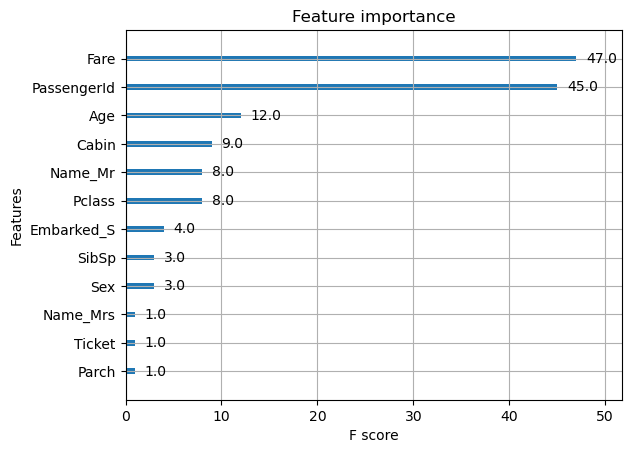

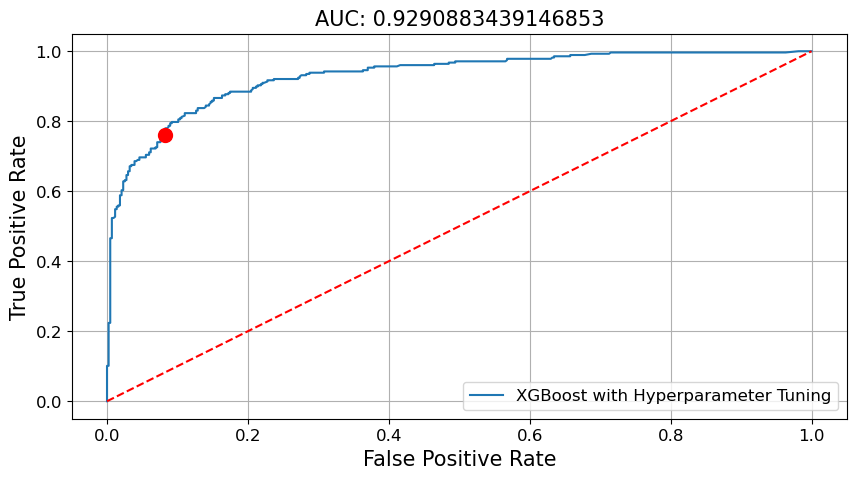

ROC Curve: Test


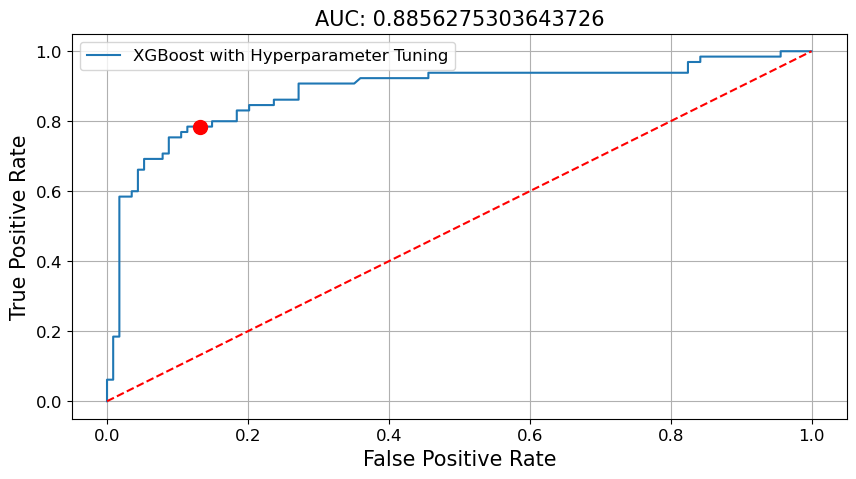

Precision-Recall Curve: Train


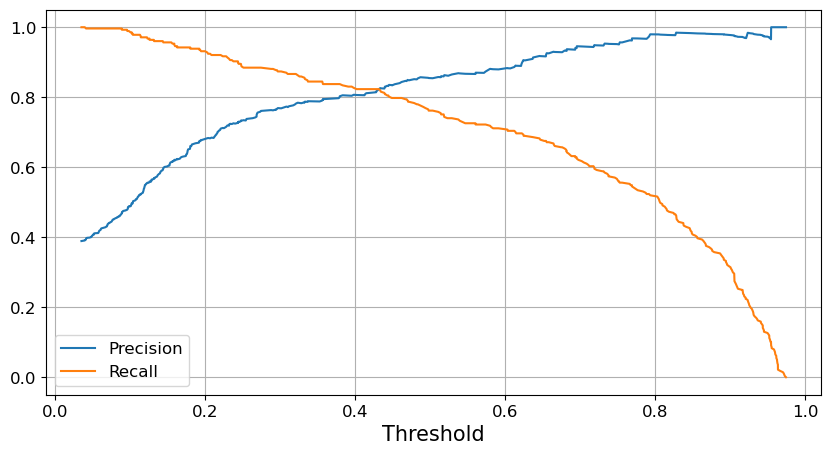

Precision-Recall Curve: Test


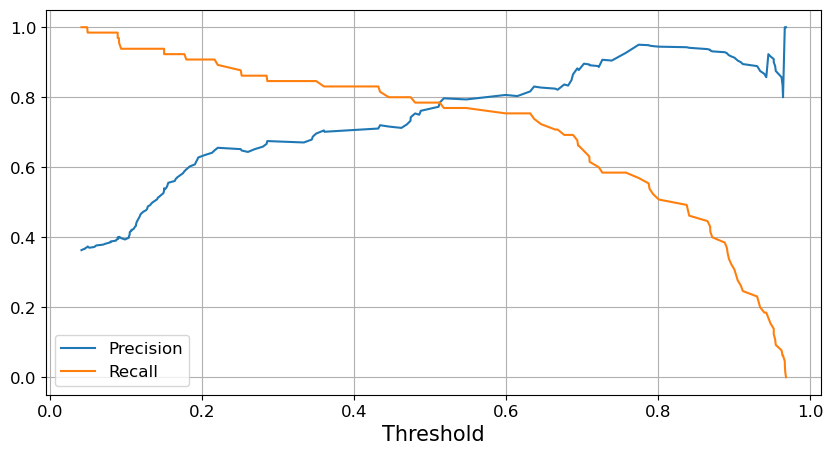

,Accuracy,AUC
Train,0.86,0.93
Test,0.84,0.89


In [15]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Titanic', 'Titanic.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = fillnull(df)
df = prep(df)

Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

label_colname = ['Sex', 'Cabin', 'Ticket']
encoder = preprocessing.LabelEncoder()
X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

onehot_colname = ['Name', 'Embarked']
X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
X_test_fe = onehot_encoding(X_test_fe, onehot_colname)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)  

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# XGBoost
model_xgb = XGBClassifier()
params = {'n_estimators': [100],    
          'max_depth': [5, 7, 9, 11],    
          'gamma': [0.1, 0.3, 0.5, 0.7, 0.9],   
          'min_child_weight': [5, 7, 9, 11],    
          'eval_metric': ['mlogloss']}
model_xgb_cv = GridSearchCV(estimator=model_xgb, param_grid=params, 
                            cv=5,  
                            n_jobs=-1)    
model_xgb_cv.fit(X_train_fes, Y_train)
print("최적 하이퍼 파라미터: ", model_xgb_cv.best_params_)

model_xgb_cv_final = XGBClassifier(**model_xgb_cv.best_params_)
model_xgb_cv_final.fit(X_train_fes, Y_train)
print("변수 중요도(분류기준): ")
display(pd.DataFrame(model_xgb_cv_final.feature_importances_, 
                     index=model_xgb_cv_final.feature_names_in_, columns=['Importance']))
print("변수 중요도(성능기준): ")
plot_importance_xgb(model_xgb_cv_final)

# 예측
Y_trpred = model_xgb_cv_final.predict(X_train_fes)
Y_tepred = model_xgb_cv_final.predict(X_test_fes)
P_trpred = model_xgb_cv_final.predict_proba(X_train_fes)
P_tepred = model_xgb_cv_final.predict_proba(X_test_fes)

# 평가/검증
label = 'XGBoost with Hyperparameter Tuning'
## Confusion Matrix
print('Confusion Matrix: Train')
evaluation_class_ConfusionMatrix(Y_train, Y_trpred)
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Train')
evaluation_class_ClassificationReport(Y_train, Y_trpred)
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Train')
evaluation_class_ROCAUC(Y_train, P_trpred[:,1], label=label)
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred[:,1], label=label)

## Precision-Recall Curve
print('Precision-Recall Curve: Train')
evaluation_class_PrecisionRecall(Y_train, P_trpred[:,1])
print('Precision-Recall Curve: Test')
evaluation_class_PrecisionRecall(Y_test, P_tepred[:,1])

## 성능검증
Score_xgb_cv_final = evaluation_class_AccuracyAUC(Y_train, P_trpred[:,1], Y_test, P_tepred[:,1])
Score_xgb_cv_final

## LightGBM

(712, 11) (712, 1)
(179, 11) (179, 1)
[LightGBM] [Info] Number of positive: 277, number of negative: 435
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000623 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.389045 -> initscore=-0.451329
[LightGBM] [Info] Start training from score -0.451329
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

,Importance
PassengerId,142
Pclass,26
Sex,21
Age,58
SibSp,24
Parch,2
Ticket,27
Fare,139
Cabin,27
Name_Mr,25


변수 중요도(성능기준): 
Confusion Matrix: Train
Confusion Matrix: Test
Classification Metrics: Train
              precision    recall  f1-score   support

     class 0       0.88      0.92      0.90       435
     class 1       0.87      0.81      0.84       277

    accuracy                           0.88       712
   macro avg       0.87      0.86      0.87       712
weighted avg       0.88      0.88      0.88       712

Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.88      0.85      0.87       114
     class 1       0.75      0.80      0.78        65

    accuracy                           0.83       179
   macro avg       0.82      0.83      0.82       179
weighted avg       0.84      0.83      0.83       179

ROC Curve: Train


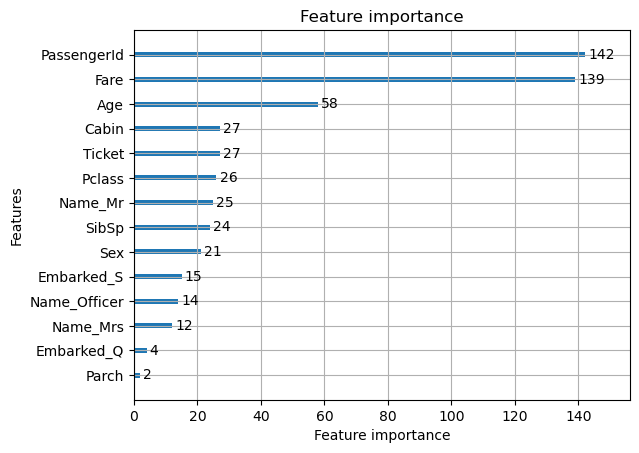

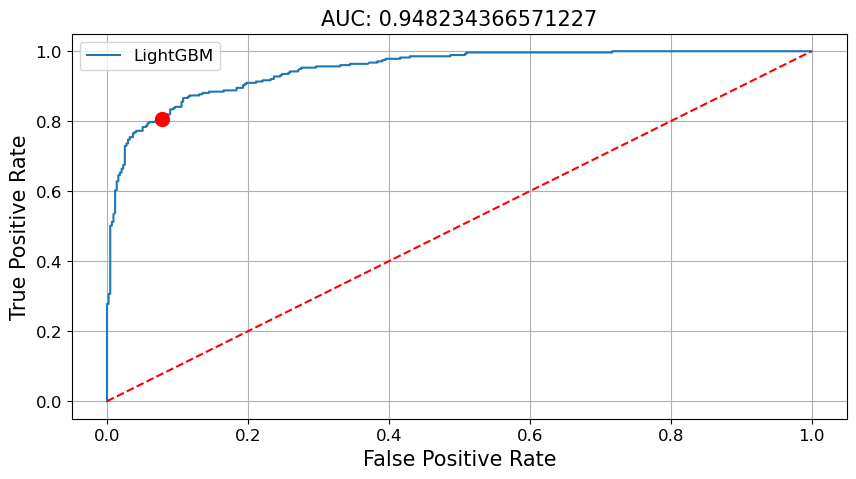

ROC Curve: Test


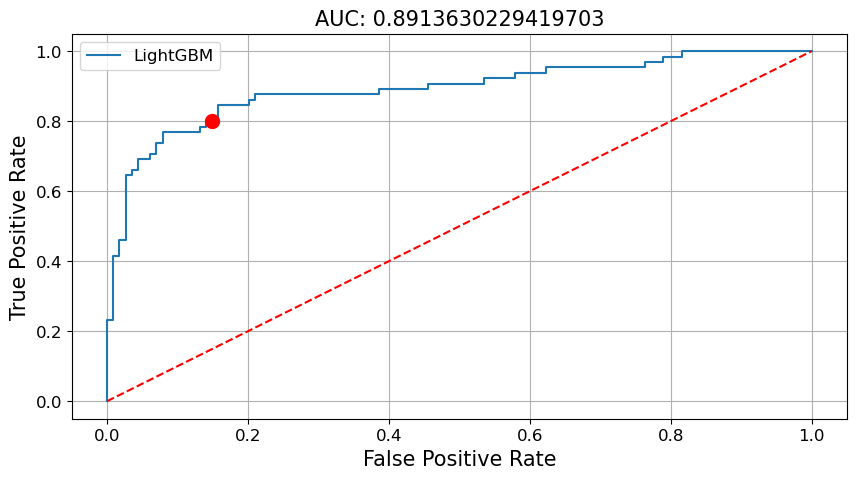

Precision-Recall Curve: Train


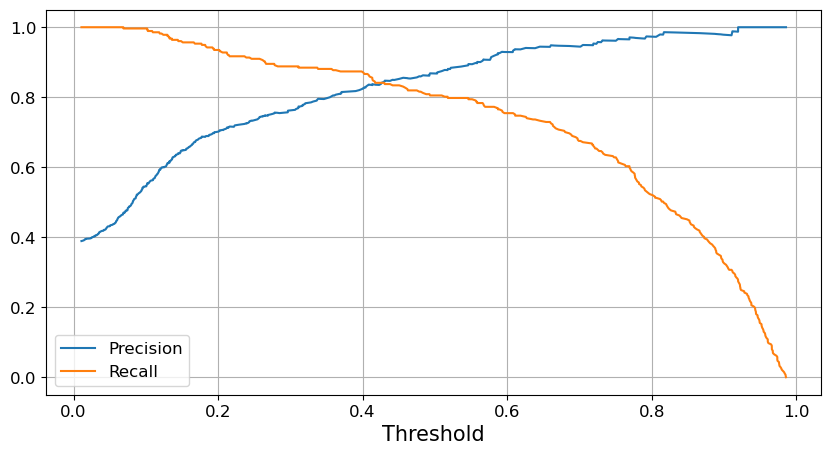

Precision-Recall Curve: Test


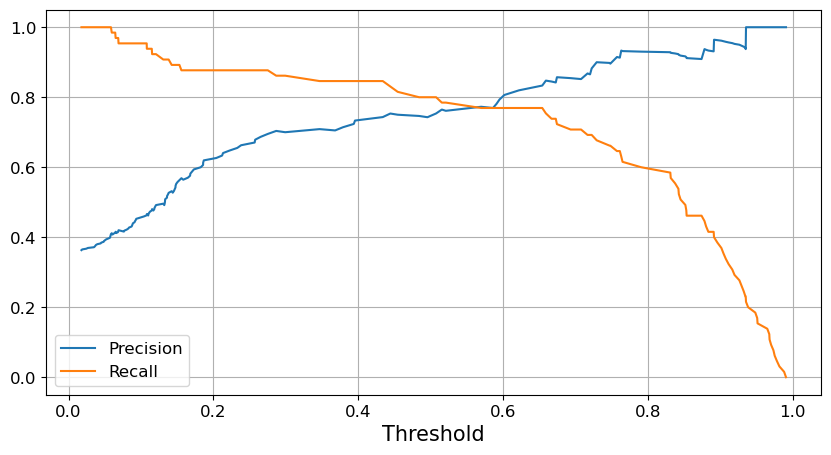

,Accuracy,AUC
Train,0.88,0.95
Test,0.83,0.89


In [16]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Titanic', 'Titanic.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = fillnull(df)
df = prep(df)

Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

label_colname = ['Sex', 'Cabin', 'Ticket']
encoder = preprocessing.LabelEncoder()
X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

onehot_colname = ['Name', 'Embarked']
X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
X_test_fe = onehot_encoding(X_test_fe, onehot_colname)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)  

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# LightGBM
model_lgbm = LGBMClassifier(n_estimators=100,
                            learning_rate=0.1,
                            max_depth=3, random_state=123)
model_lgbm.fit(X_train_fes, Y_train)
print("변수 중요도(분류기준): ")
display(pd.DataFrame(model_lgbm.feature_importances_, 
                     index=model_lgbm.feature_name_, columns=['Importance']))
print("변수 중요도(성능기준): ")
plot_importance_lgbm(model_lgbm)

# 예측
Y_trpred = model_lgbm.predict(X_train_fes)
Y_tepred = model_lgbm.predict(X_test_fes)
P_trpred = model_lgbm.predict_proba(X_train_fes)
P_tepred = model_lgbm.predict_proba(X_test_fes)

# 평가/검증
label = 'LightGBM'
## Confusion Matrix
print('Confusion Matrix: Train')
evaluation_class_ConfusionMatrix(Y_train, Y_trpred)
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Train')
evaluation_class_ClassificationReport(Y_train, Y_trpred)
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Train')
evaluation_class_ROCAUC(Y_train, P_trpred[:,1], label=label)
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred[:,1], label=label)

## Precision-Recall Curve
print('Precision-Recall Curve: Train')
evaluation_class_PrecisionRecall(Y_train, P_trpred[:,1])
print('Precision-Recall Curve: Test')
evaluation_class_PrecisionRecall(Y_test, P_tepred[:,1])

## 성능검증
Score_lgbm = evaluation_class_AccuracyAUC(Y_train, P_trpred[:,1], Y_test, P_tepred[:,1])
Score_lgbm

## LightGBM with Hyperparameter Tuning

(712, 11) (712, 1)
(179, 11) (179, 1)
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Info] Number of positive: 277, number of negative: 435
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.389045 -> initscore=-0.451329
[LightGBM] [Info] Start training from score -0.451329
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

,Importance
PassengerId,178
Pclass,43
Sex,12
Age,61
SibSp,14
Parch,3
Ticket,5
Fare,222
Cabin,41
Name_Mr,34


변수 중요도(성능기준): 
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
Confusion Matrix: Train
Confusion Matrix: Test
Classification Metrics: Train
              precision    recall  f1-score   support

     class 0       0.86      0.92      0.89       435
     class 1       0.85      0.76      0.81       277

    accuracy                           0.86       712
   macro avg       0.86      0.84      0.85       712
weighted avg       0.86      0.86      0.86       712

Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.88      0.88      0.88       114
     class 1       0.78      0.78      0.78        65

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

ROC Curve: Train


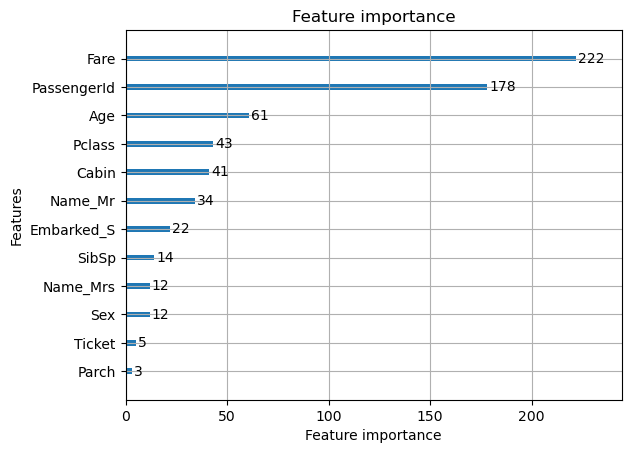

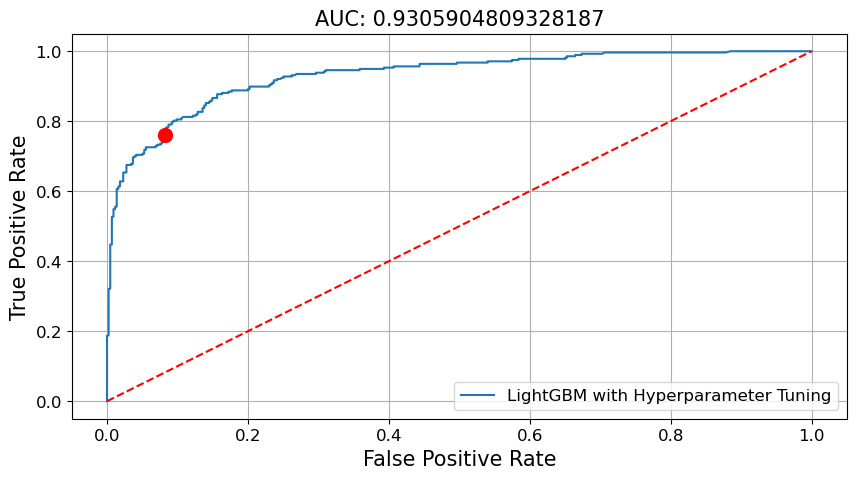

ROC Curve: Test


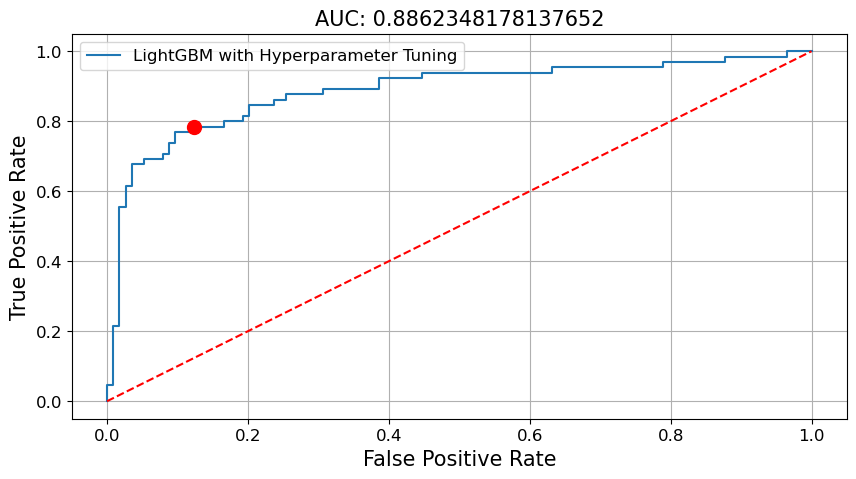

Precision-Recall Curve: Train


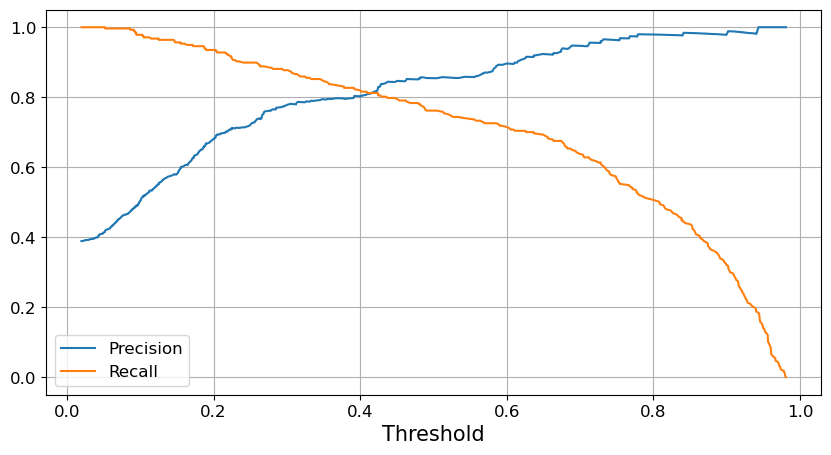

Precision-Recall Curve: Test


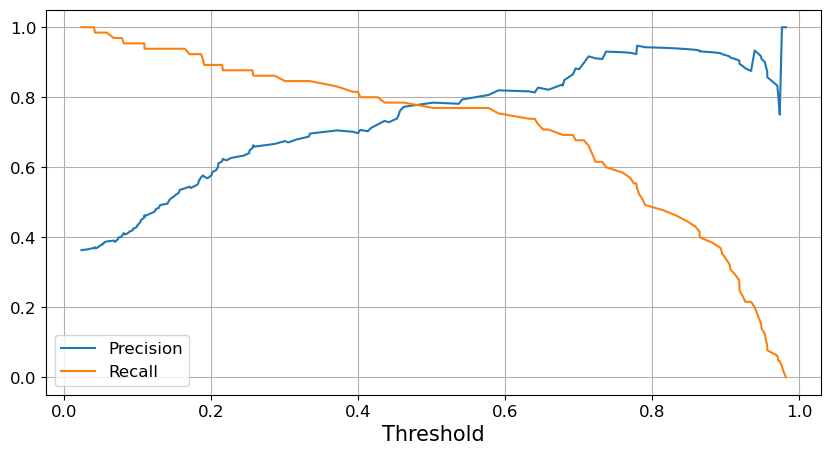

,Accuracy,AUC
Train,0.86,0.93
Test,0.84,0.89


In [17]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Titanic', 'Titanic.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = fillnull(df)
df = prep(df)

Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

label_colname = ['Sex', 'Cabin', 'Ticket']
encoder = preprocessing.LabelEncoder()
X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

onehot_colname = ['Name', 'Embarked']
X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
X_test_fe = onehot_encoding(X_test_fe, onehot_colname)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)  

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# LightGBM
model_lgbm = LGBMClassifier()
params = {'n_estimators': [100],    
          'max_depth': [5, 7, 9, 11],   
          'gamma': [0.1, 0.3, 0.5, 0.7, 0.9],   
          'min_child_weight': [5, 7, 9, 11]}    
model_lgbm_cv = GridSearchCV(estimator=model_lgbm, param_grid=params, 
                             cv=5,    
                             n_jobs=-1)     
model_lgbm_cv.fit(X_train_fes, Y_train)
print("최적 하이퍼 파라미터: ", model_lgbm_cv.best_params_)

model_lgbm_cv_final = LGBMClassifier(**model_lgbm_cv.best_params_)
model_lgbm_cv_final.fit(X_train_fes, Y_train)
print("변수 중요도(분류기준): ")
display(pd.DataFrame(model_lgbm_cv_final.feature_importances_, 
                     index=model_lgbm_cv_final.feature_name_, columns=['Importance']))
print("변수 중요도(성능기준): ")
plot_importance_lgbm(model_lgbm_cv_final)

# 예측
Y_trpred = model_lgbm_cv_final.predict(X_train_fes)
Y_tepred = model_lgbm_cv_final.predict(X_test_fes)
P_trpred = model_lgbm_cv_final.predict_proba(X_train_fes)
P_tepred = model_lgbm_cv_final.predict_proba(X_test_fes)

# 평가/검증
label = 'LightGBM with Hyperparameter Tuning'
## Confusion Matrix
print('Confusion Matrix: Train')
evaluation_class_ConfusionMatrix(Y_train, Y_trpred)
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Train')
evaluation_class_ClassificationReport(Y_train, Y_trpred)
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Train')
evaluation_class_ROCAUC(Y_train, P_trpred[:,1], label=label)
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred[:,1], label=label)

## Precision-Recall Curve
print('Precision-Recall Curve: Train')
evaluation_class_PrecisionRecall(Y_train, P_trpred[:,1])
print('Precision-Recall Curve: Test')
evaluation_class_PrecisionRecall(Y_test, P_tepred[:,1])

## 성능검증
Score_lgbm_cv_final = evaluation_class_AccuracyAUC(Y_train, P_trpred[:,1], Y_test, P_tepred[:,1])
Score_lgbm_cv_final

## CatBoost

(712, 11) (712, 1)
(179, 11) (179, 1)
변수 중요도(분류기준): 


,Importance
PassengerId,2.71
Pclass,13.95
Sex,15.01
Age,5.69
SibSp,4.89
Parch,0.37
Ticket,2.49
Fare,5.61
Cabin,6.00
Name_Mr,38.48


변수 중요도(성능기준): 
Confusion Matrix: Train
Confusion Matrix: Test
Classification Metrics: Train
              precision    recall  f1-score   support

     class 0       0.86      0.90      0.88       435
     class 1       0.83      0.77      0.80       277

    accuracy                           0.85       712
   macro avg       0.84      0.83      0.84       712
weighted avg       0.85      0.85      0.85       712

Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.88      0.88      0.88       114
     class 1       0.78      0.78      0.78        65

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

ROC Curve: Train


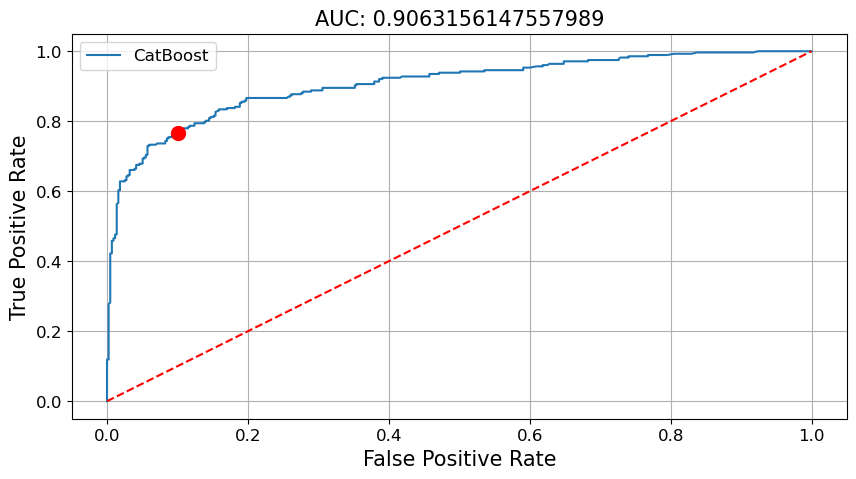

ROC Curve: Test


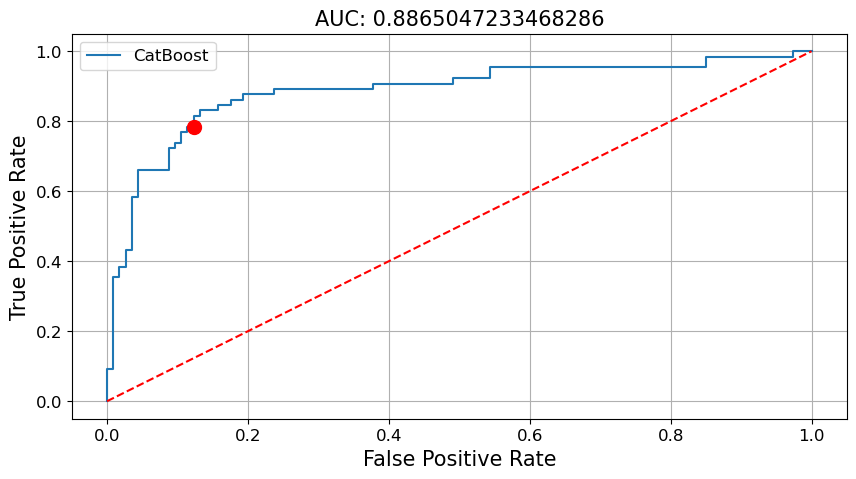

Precision-Recall Curve: Train


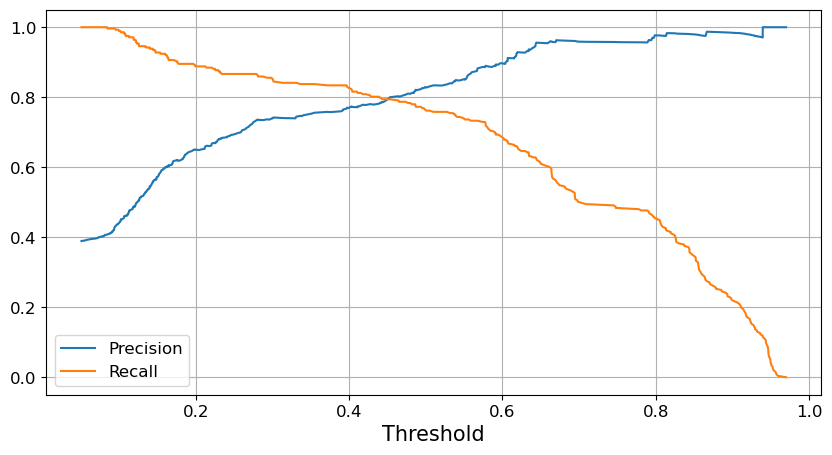

Precision-Recall Curve: Test


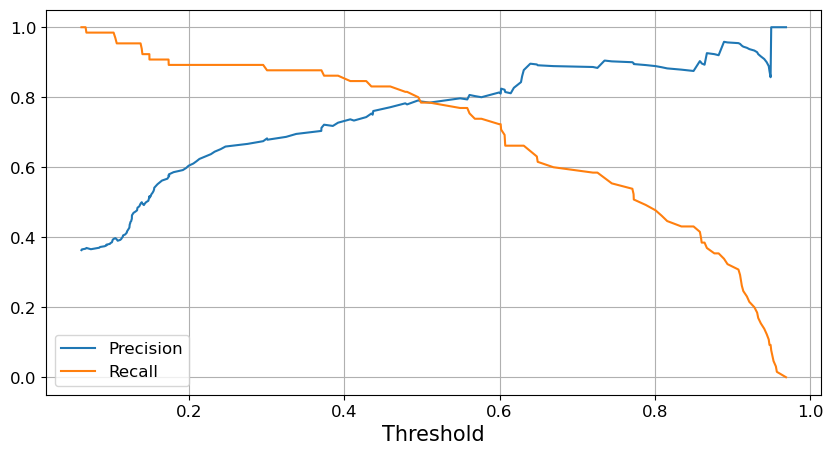

,Accuracy,AUC
Train,0.85,0.91
Test,0.84,0.89


In [18]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Titanic', 'Titanic.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = fillnull(df)
df = prep(df)

Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

label_colname = ['Sex', 'Cabin', 'Ticket']
encoder = preprocessing.LabelEncoder()
X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

onehot_colname = ['Name', 'Embarked']
X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
X_test_fe = onehot_encoding(X_test_fe, onehot_colname)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)  

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# CatBoost
model_cb = CatBoostClassifier(n_estimators=100,
                              learning_rate=0.1,
                              max_depth=3, random_state=123,
                              verbose=0)
model_cb.fit(X_train_fes, Y_train)
print("변수 중요도(분류기준): ")
display(pd.DataFrame(model_cb.feature_importances_, 
                     index=model_cb.feature_names_, columns=['Importance']))
print("변수 중요도(성능기준): ")

# 예측
Y_trpred = model_cb.predict(X_train_fes)
Y_tepred = model_cb.predict(X_test_fes)
P_trpred = model_cb.predict_proba(X_train_fes)
P_tepred = model_cb.predict_proba(X_test_fes)

# 평가/검증
label = 'CatBoost'
## Confusion Matrix
print('Confusion Matrix: Train')
evaluation_class_ConfusionMatrix(Y_train, Y_trpred)
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Train')
evaluation_class_ClassificationReport(Y_train, Y_trpred)
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Train')
evaluation_class_ROCAUC(Y_train, P_trpred[:,1], label=label)
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred[:,1], label=label)

## Precision-Recall Curve
print('Precision-Recall Curve: Train')
evaluation_class_PrecisionRecall(Y_train, P_trpred[:,1])
print('Precision-Recall Curve: Test')
evaluation_class_PrecisionRecall(Y_test, P_tepred[:,1])

## 성능검증
Score_cb = evaluation_class_AccuracyAUC(Y_train, P_trpred[:,1], Y_test, P_tepred[:,1])
Score_cb

## CatBoost with Hyperparameter Tuning

(712, 11) (712, 1)
(179, 11) (179, 1)
최적 하이퍼 파라미터:  {'max_depth': 7, 'n_estimators': 100}
Learning rate set to 0.073611
0:	learn: 0.6638094	total: 1.76ms	remaining: 174ms
1:	learn: 0.6415075	total: 3.13ms	remaining: 154ms
2:	learn: 0.6220586	total: 4.69ms	remaining: 152ms
3:	learn: 0.6050124	total: 6.3ms	remaining: 151ms
4:	learn: 0.5879276	total: 7.7ms	remaining: 146ms
5:	learn: 0.5732937	total: 9.28ms	remaining: 145ms
6:	learn: 0.5587038	total: 10.8ms	remaining: 144ms
7:	learn: 0.5472771	total: 12.3ms	remaining: 141ms
8:	learn: 0.5370884	total: 13.8ms	remaining: 139ms
9:	learn: 0.5254219	total: 15.2ms	remaining: 137ms
10:	learn: 0.5157570	total: 16.7ms	remaining: 135ms
11:	learn: 0.5054979	total: 18.1ms	remaining: 133ms
12:	learn: 0.4960305	total: 18.6ms	remaining: 125ms
13:	learn: 0.4892476	total: 20.1ms	remaining: 124ms
14:	learn: 0.4820263	total: 21.5ms	remaining: 122ms
15:	learn: 0.4747184	total: 22.9ms	remaining: 120ms
16:	learn: 0.4694386	total: 23.6ms	remaining: 115ms
17:	lear

,Importance
PassengerId,5.38
Pclass,10.65
Sex,19.30
Age,6.52
SibSp,5.36
Parch,1.53
Ticket,3.37
Fare,8.42
Cabin,5.52
Name_Mr,28.19


Confusion Matrix: Train
Confusion Matrix: Test
Classification Metrics: Train
              precision    recall  f1-score   support

     class 0       0.87      0.92      0.90       435
     class 1       0.87      0.79      0.83       277

    accuracy                           0.87       712
   macro avg       0.87      0.86      0.86       712
weighted avg       0.87      0.87      0.87       712

Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.89      0.87      0.88       114
     class 1       0.78      0.82      0.80        65

    accuracy                           0.85       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179

ROC Curve: Train


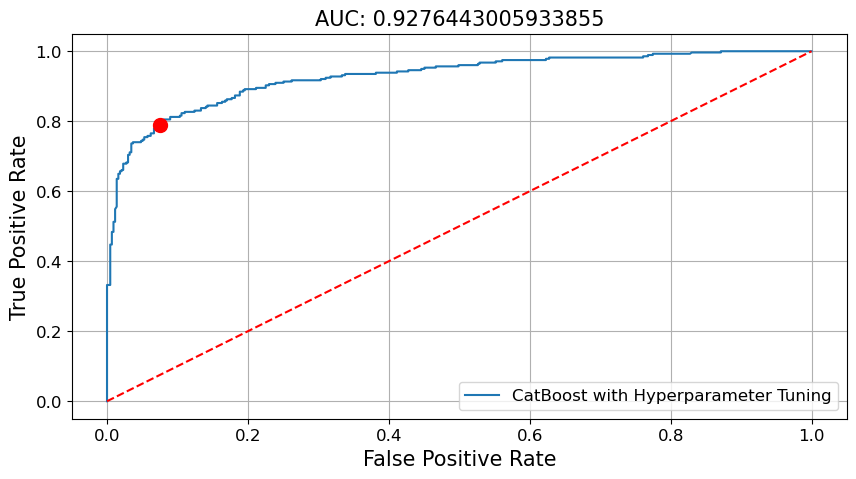

ROC Curve: Test


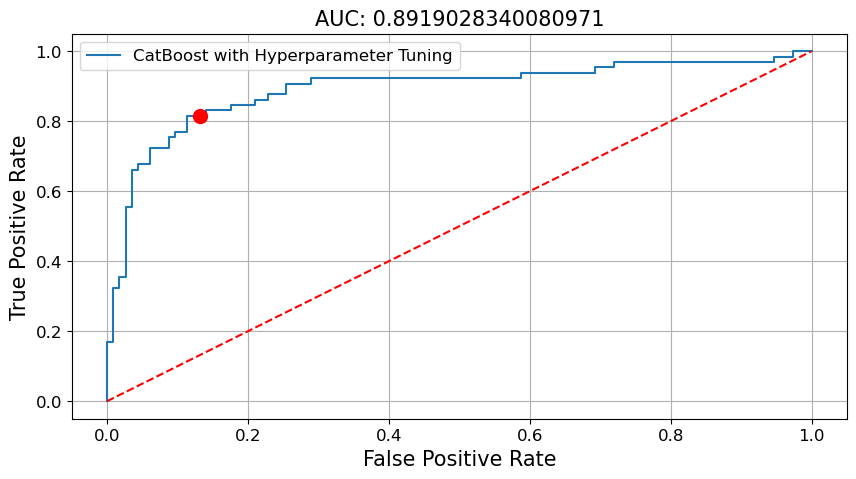

Precision-Recall Curve: Train


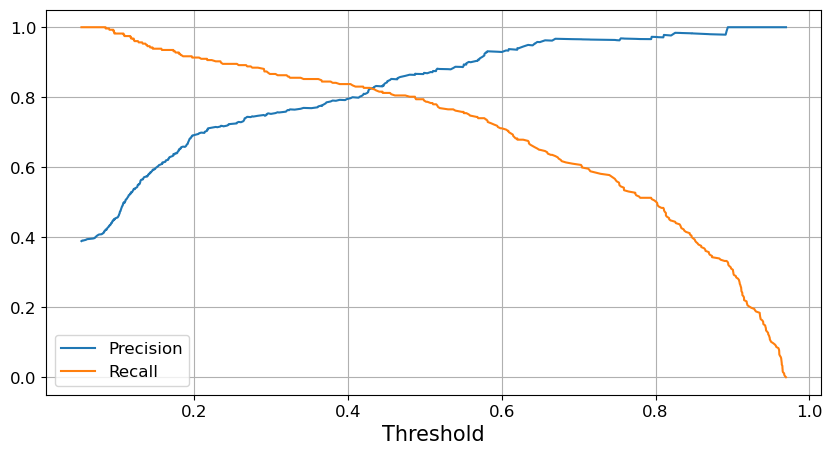

Precision-Recall Curve: Test


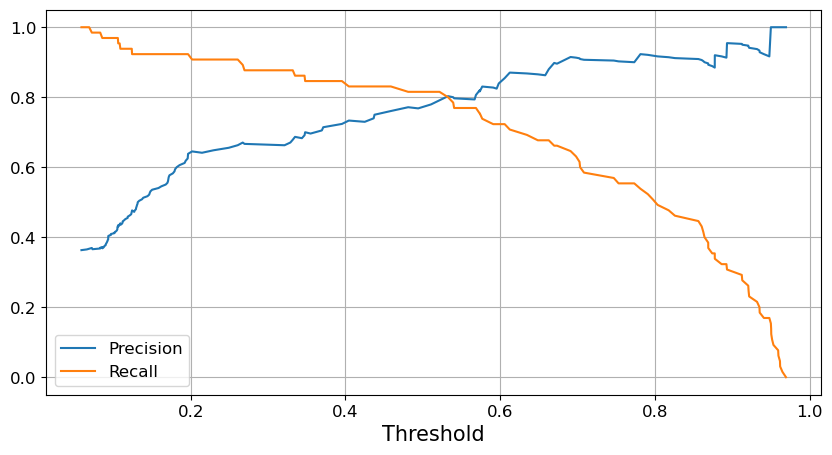

,Accuracy,AUC
Train,0.87,0.93
Test,0.85,0.89


In [19]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Titanic', 'Titanic.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = fillnull(df)
df = prep(df)

Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

label_colname = ['Sex', 'Cabin', 'Ticket']
encoder = preprocessing.LabelEncoder()
X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

onehot_colname = ['Name', 'Embarked']
X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
X_test_fe = onehot_encoding(X_test_fe, onehot_colname)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)  

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# CatBoost
model_cb = CatBoostClassifier(verbose=0)
params = {'n_estimators': [100],    
          'max_depth': [5, 7, 9, 11]}    
model_cb_cv = GridSearchCV(estimator=model_cb, param_grid=params, 
                           cv=5,    
                           n_jobs=-1)     
model_cb_cv.fit(X_train_fes, Y_train)
print("최적 하이퍼 파라미터: ", model_cb_cv.best_params_)

model_cb_cv_final = CatBoostClassifier(**model_cb_cv.best_params_)
model_cb_cv_final.fit(X_train_fes, Y_train)
print("변수 중요도(분류기준): ")
display(pd.DataFrame(model_cb_cv_final.feature_importances_, 
                     index=model_cb_cv_final.feature_names_, columns=['Importance']))

# 예측
Y_trpred = model_cb_cv_final.predict(X_train_fes)
Y_tepred = model_cb_cv_final.predict(X_test_fes)
P_trpred = model_cb_cv_final.predict_proba(X_train_fes)
P_tepred = model_cb_cv_final.predict_proba(X_test_fes)

# 평가/검증
label = 'CatBoost with Hyperparameter Tuning'
## Confusion Matrix
print('Confusion Matrix: Train')
evaluation_class_ConfusionMatrix(Y_train, Y_trpred)
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Train')
evaluation_class_ClassificationReport(Y_train, Y_trpred)
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Train')
evaluation_class_ROCAUC(Y_train, P_trpred[:,1], label=label)
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred[:,1], label=label)

## Precision-Recall Curve
print('Precision-Recall Curve: Train')
evaluation_class_PrecisionRecall(Y_train, P_trpred[:,1])
print('Precision-Recall Curve: Test')
evaluation_class_PrecisionRecall(Y_test, P_tepred[:,1])

## 성능검증
Score_cb_cv_final = evaluation_class_AccuracyAUC(Y_train, P_trpred[:,1], Y_test, P_tepred[:,1])
Score_cb_cv_final

# **Advanced Algorithm:** Stacking

## Stacking

(712, 11) (712, 1)
(179, 11) (179, 1)
Confusion Matrix: Train
Confusion Matrix: Test
Classification Metrics: Train
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00       435
     class 1       1.00      1.00      1.00       277

    accuracy                           1.00       712
   macro avg       1.00      1.00      1.00       712
weighted avg       1.00      1.00      1.00       712

Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.87      0.84      0.86       114
     class 1       0.74      0.78      0.76        65

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

ROC Curve: Train


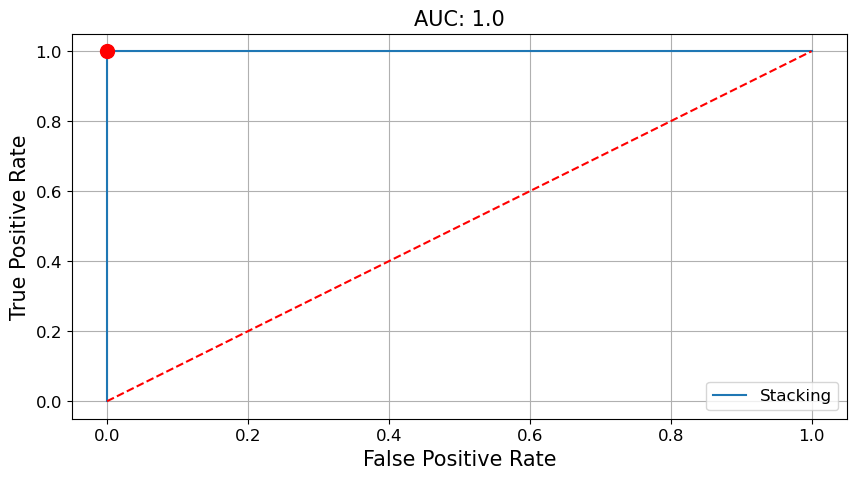

ROC Curve: Test


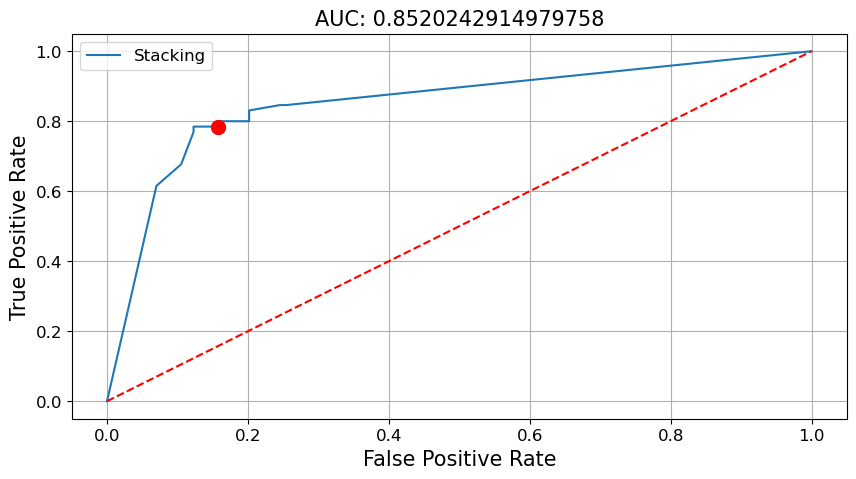

Precision-Recall Curve: Train


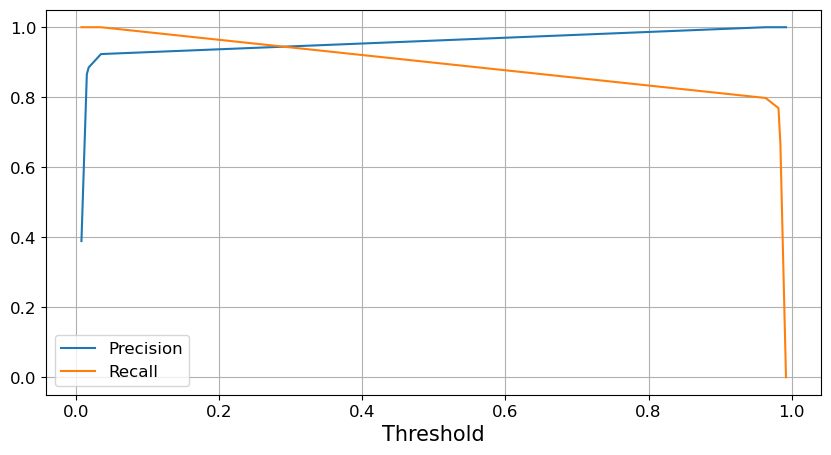

Precision-Recall Curve: Test


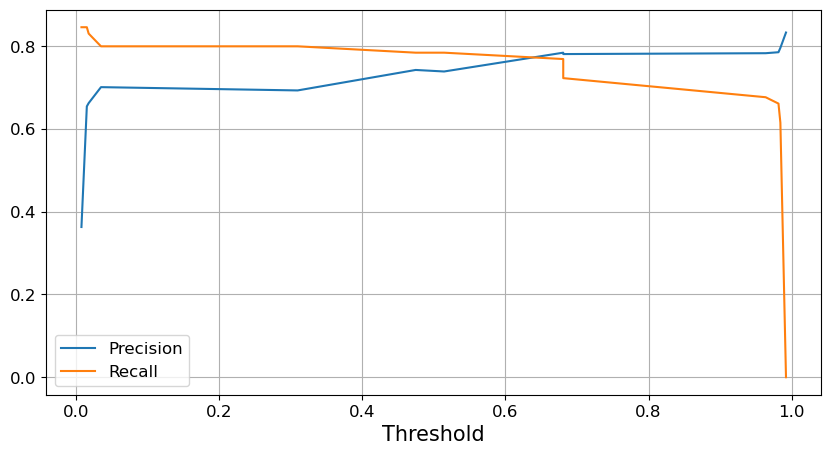

,Accuracy,AUC
Train,1.00,1.00
Test,0.82,0.85


In [20]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Titanic', 'Titanic.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = fillnull(df)
df = prep(df)

Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

label_colname = ['Sex', 'Cabin', 'Ticket']
encoder = preprocessing.LabelEncoder()
X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

onehot_colname = ['Name', 'Embarked']
X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
X_test_fe = onehot_encoding(X_test_fe, onehot_colname)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)  

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Stacking
## Weak Learners
model_knn = KNeighborsClassifier()
model_svm = SVC()
model_rf = RandomForestClassifier()
model_xgb = XGBClassifier(eval_metric='mlogloss')

model_logitreg = LogisticRegression()
clf = [model_knn, model_svm, model_rf, model_xgb]
model_stack = StackingClassifier(classifiers=clf, 
                                 meta_classifier=model_logitreg)
model_stack.fit(X_train_fes, np.ravel(Y_train))

# 예측
Y_trpred = model_stack.predict(X_train_fes)
Y_tepred = model_stack.predict(X_test_fes)
P_trpred = model_stack.predict_proba(X_train_fes)
P_tepred = model_stack.predict_proba(X_test_fes)

# 평가/검증
label = 'Stacking'
## Confusion Matrix
print('Confusion Matrix: Train')
evaluation_class_ConfusionMatrix(Y_train, Y_trpred)
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Train')
evaluation_class_ClassificationReport(Y_train, Y_trpred)
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Train')
evaluation_class_ROCAUC(Y_train, P_trpred[:,1], label=label)
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred[:,1], label=label)

## Precision-Recall Curve
print('Precision-Recall Curve: Train')
evaluation_class_PrecisionRecall(Y_train, P_trpred[:,1])
print('Precision-Recall Curve: Test')
evaluation_class_PrecisionRecall(Y_test, P_tepred[:,1])

## 성능검증
Score_stack = evaluation_class_AccuracyAUC(Y_train, P_trpred[:,1], Y_test, P_tepred[:,1])
Score_stack

## Stacking with Hyperparameter Tuning

(712, 11) (712, 1)
(179, 11) (179, 1)
Confusion Matrix: Train
Confusion Matrix: Test
Classification Metrics: Train
              precision    recall  f1-score   support

     class 0       0.86      0.94      0.90       435
     class 1       0.89      0.76      0.82       277

    accuracy                           0.87       712
   macro avg       0.88      0.85      0.86       712
weighted avg       0.87      0.87      0.87       712

Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.87      0.88      0.87       114
     class 1       0.78      0.77      0.78        65

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179

ROC Curve: Train


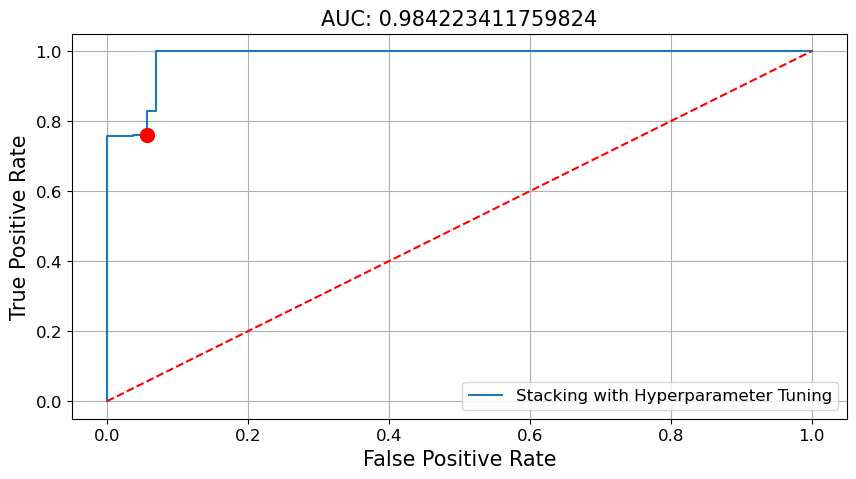

ROC Curve: Test


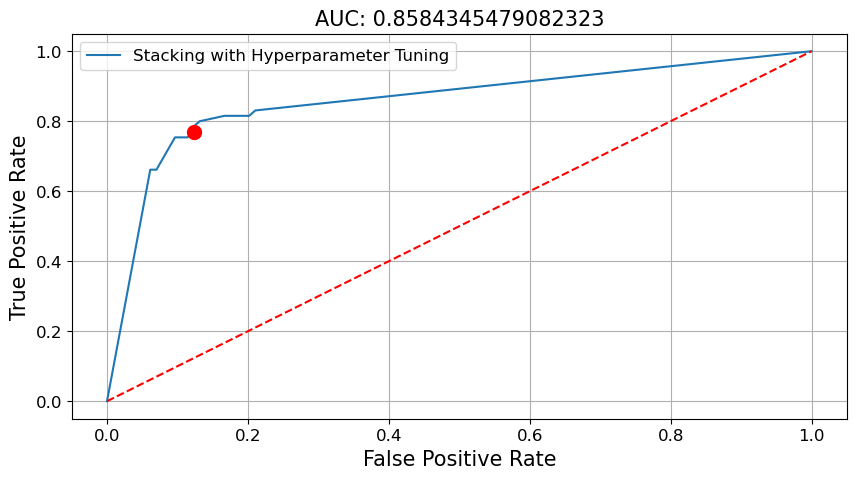

Precision-Recall Curve: Train


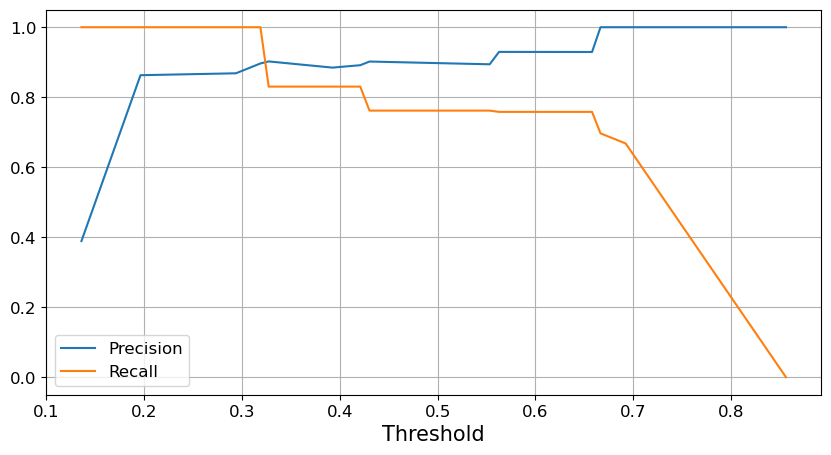

Precision-Recall Curve: Test


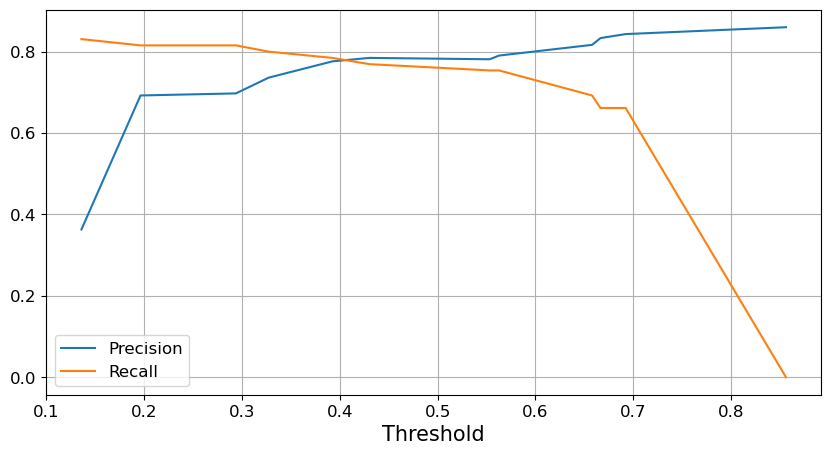

,Accuracy,AUC
Train,0.87,0.98
Test,0.84,0.86


In [21]:
# 데이터 로딩
location = os.path.join('.', 'Data', 'Titanic', 'Titanic.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = fillnull(df)
df = prep(df)

Y_colname = ['Survived']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

label_colname = ['Sex', 'Cabin', 'Ticket']
encoder = preprocessing.LabelEncoder()
X_train_fe, X_test_fe = label_encoding(X_train, X_test, label_colname, encoder)

onehot_colname = ['Name', 'Embarked']
X_train_fe = onehot_encoding(X_train_fe, onehot_colname)
X_test_fe = onehot_encoding(X_test_fe, onehot_colname)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)  

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Stacking
## Weak Learners
model_knn = KNeighborsClassifier()
model_svm = SVC()
model_rf = RandomForestClassifier()
model_xgb = XGBClassifier(eval_metric='mlogloss')

model_logitreg = LogisticRegression()
clf = [model_knn, model_svm, model_rf, model_xgb]
model_stack = StackingCVClassifier(classifiers=clf, meta_classifier=model_logitreg)
params = {'kneighborsclassifier__n_neighbors': [5, 7],
          'svc__kernel': ['rbf'],
          'randomforestclassifier__n_estimators': [100],
          'randomforestclassifier__max_depth': [5, 7, 9],    
          'xgbclassifier__n_estimators': [100],    
          'xgbclassifier__max_depth': [5, 7, 9],
          'xgbclassifier__eval_metric': ['mlogloss']}
model_stack_cv = GridSearchCV(estimator=model_stack, param_grid=params, 
                              cv=5,  
                              n_jobs=-1)    
model_stack_cv.fit(X_train_fes, np.ravel(Y_train))

# 예측
Y_trpred = model_stack_cv.predict(X_train_fes)
Y_tepred = model_stack_cv.predict(X_test_fes)
P_trpred = model_stack_cv.predict_proba(X_train_fes)
P_tepred = model_stack_cv.predict_proba(X_test_fes)

# 평가/검증
label = 'Stacking with Hyperparameter Tuning'
## Confusion Matrix
print('Confusion Matrix: Train')
evaluation_class_ConfusionMatrix(Y_train, Y_trpred)
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Train')
evaluation_class_ClassificationReport(Y_train, Y_trpred)
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Train')
evaluation_class_ROCAUC(Y_train, P_trpred[:,1], label=label)
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred[:,1], label=label)

## Precision-Recall Curve
print('Precision-Recall Curve: Train')
evaluation_class_PrecisionRecall(Y_train, P_trpred[:,1])
print('Precision-Recall Curve: Test')
evaluation_class_PrecisionRecall(Y_test, P_tepred[:,1])

## 성능검증
Score_stack_cv = evaluation_class_AccuracyAUC(Y_train, P_trpred[:,1], Y_test, P_tepred[:,1])
Score_stack_cv

# **Comparison**

,Accuracy,AUC
Logistic Regression,0.84,0.88
Ridge,0.82,0.87
Lasso,0.80,0.87
Elastic Net,0.81,0.86
Voting,0.84,0.89
Decision Tree,0.72,0.72
Random Forest,0.83,0.89
RF with CF,0.84,0.90
Gradient Boosting,0.84,0.89
GBM with CV,0.84,0.86


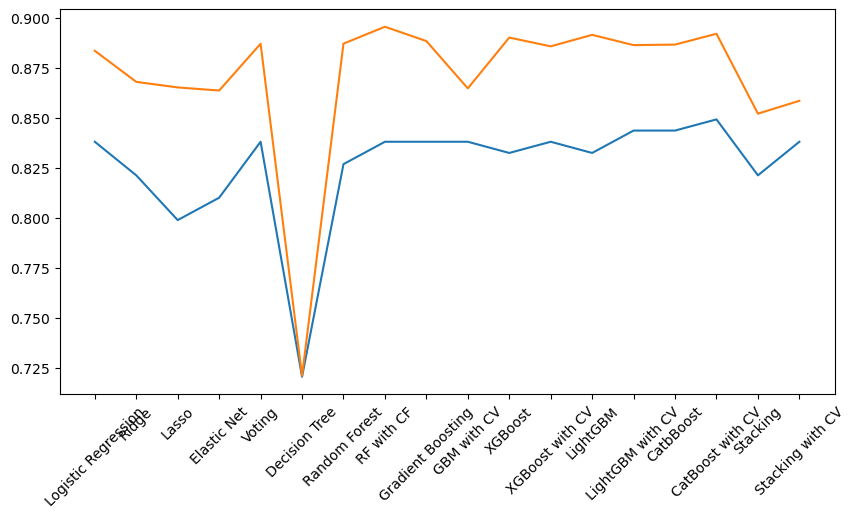

In [22]:
# 결과비교
labels = ['Logistic Regression', 'Ridge', 'Lasso', 'Elastic Net',
          'Voting', 'Decision Tree', 'Random Forest', 'RF with CF', 
          'Gradient Boosting', 'GBM with CV', 'XGBoost', 'XGBoost with CV', 
          'LightGBM', 'LightGBM with CV', 'CatbBoost', 'CatBoost with CV',
          'Stacking', 'Stacking with CV']
models = [Score_logitreg, Score_ridge, Score_lasso, Score_en,
          Score_voting, Score_dt,
          Score_rf, Score_rf_cv_final, Score_gb, Score_gb_cv_final,
          Score_xgb, Score_xgb_cv_final, Score_lgbm, Score_lgbm_cv_final, 
          Score_cb, Score_cb_cv_final, Score_stack, Score_stack_cv]
result_classification = pd.DataFrame()
for result in models:
    result_classification = pd.concat([result_classification, result.iloc[1:,:]], axis=0)
result_classification.index = labels
display(result_classification)

# 시각화
plt.figure(figsize=(10,5))
plt.plot(result_classification)
plt.xticks(rotation=45)
plt.show()